In [1]:
#Import

import numpy as np
import matplotlib.pyplot as plt
from multipole_signal import Signal
from CAMBsolver import Solver
import fishermat as fm
import pandas as pd

#Set current directory
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)
print(SCRIPT_DIR)

#Configuration
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\Daniel SB\OneDrive\Documentos\GitHub


In [2]:
# Redshift bins

z_bins = np.array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95])

# Separations

dist = [
    np.arange(20, 164, 4),
    np.arange(32, 164, 4),
]

params_dict0 = {
    'h' : 0.677,
    'As' : 2.05e-9,
    'ns' : 0.965,
    'Ob' : 0.0490, # This is here the density parameter of Baryons
    'Om' : 0.3111, # This is here the density parameter of Cold Dark Matter
}

steps = [1e-3, 1e-1, 1e-4, 1e-2, 1e-2]

# S/N for $m=2$ 

Compute signals for a given split

In [3]:
m_split = 2.

mySolver = Solver(zs=[0.0], **params_dict0, NonLin=False, silent=True)
mySignals = Signal(solver=mySolver, n_split=m_split, which_multipoles=['monopole', 'dipole', 'quadrupole', 'hexadecapole', 'octupole'], wide_angle=False, evol_bias=False, return_lists=True)

multipoles_signals = mySignals.calculate_signal(d = dist[0], z = z_bins)

In [4]:
np.shape(multipoles_signals)

(9, 19, 36)

In [5]:
monopoleBB = multipoles_signals[0]
monopoleBF = multipoles_signals[1]
monopoleFF = multipoles_signals[2]
dipoleBF = multipoles_signals[3]
quadrupoleBB = multipoles_signals[4]
quadrupoleBF = multipoles_signals[5]
quadrupoleFF = multipoles_signals[6]
hexadecapoleTT = multipoles_signals[7]
octupoleBF = multipoles_signals[8]

Import variances of the observables

In [6]:
CovMatrix_all = np.array(fm.cov_matrix_survey(d = dist[0], z_bins = z_bins, small_off_diagonal=True, split=[50,50]))

np.shape(CovMatrix_all)


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 50% BRIGHT - 50% FAINT 


 ... Success! ... 



(19, 324, 324)

In [7]:
n_sep = len(monopoleBB[0])

print(f'Separations per multipole = {n_sep}')

Separations per multipole = 36


In [8]:
n_multipoles = len(multipoles_signals)

CovMatrix_monoBB = CovMatrix_all[:, :36, :36]
CovMatrix_monoBF = CovMatrix_all[:, int(36):int(2*36), int(36):int(2*36)]
CovMatrix_monoFF = CovMatrix_all[:, int(2*36):int(3*36), int(2*36):int(3*36)]
CovMatrix_dipBF = CovMatrix_all[:, int(3*36):int(4*36), int(3*36):int(4*36)]
CovMatrix_quadBB = CovMatrix_all[:, int(4*36):int(5*36), int(4*36):int(5*36)]
CovMatrix_quadBF = CovMatrix_all[:, int(5*36):int(6*36), int(5*36):int(6*36)]
CovMatrix_quadFF = CovMatrix_all[:, int(6*36):int(7*36), int(6*36):int(7*36)]
CovMatrix_hexaTT = CovMatrix_all[:, int(7*36):int(8*36), int(7*36):int(8*36)]
CovMatrix_octBF = CovMatrix_all[:, int(8*36):, int(8*36):]

np.shape(CovMatrix_monoBB), np.shape(CovMatrix_dipBF), np.shape(CovMatrix_quadBB), np.shape(CovMatrix_hexaTT), np.shape(CovMatrix_octBF), np.shape(CovMatrix_monoFF), np.shape(CovMatrix_quadFF)


((19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36))

In [9]:
cumsnr_monoBB, snr_monoBB = fm.signal_to_noise(signal = monopoleBB, cov = CovMatrix_monoBB, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 58.77778459073742
Bin 2: 89.48889245807327
Bin 3: 114.77216782704265
Bin 4: 134.72460348017003
Bin 5: 149.54413550062662
Bin 6: 159.54030796388287
Bin 7: 164.90339004053465
Bin 8: 165.89188098796922
Bin 9: 162.67860406734107
Bin 10: 155.4528488588676
Bin 11: 144.79728569315122
Bin 12: 131.19437239365107
Bin 13: 115.31733098751681
Bin 14: 98.25407858884707
Bin 15: 80.54551462248301
Bin 16: 63.43402809811456
Bin 17: 47.778558819147
Bin 18: 34.11066042526197
Bin 19: 23.020062575484705

--------------------------------------------------

 Cumulative SNR : 521.1180798626643 

--------------------------------------------------


In [10]:
cumsnr_monoFF, snr_monoFF = fm.signal_to_noise(signal = monopoleFF, cov = CovMatrix_monoFF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 38.76114699942798
Bin 2: 58.81304951066757
Bin 3: 74.88321387596324
Bin 4: 86.86965354970569
Bin 5: 94.82642426229307
Bin 6: 99.1217371414244
Bin 7: 99.97311345695249
Bin 8: 97.7973848252195
Bin 9: 92.92986924477607
Bin 10: 85.75801838000683
Bin 11: 77.0180392972251
Bin 12: 67.1982509297588
Bin 13: 56.8406301389376
Bin 14: 46.65550254753639
Bin 15: 36.85383588236483
Bin 16: 28.044587179909595
Bin 17: 20.506412869345326
Bin 18: 14.303991702997374
Bin 19: 9.522215230972574

--------------------------------------------------

 Cumulative SNR : 301.9887808092494 

--------------------------------------------------


In [11]:
cumsnr_monoBF, snr_monoBF = fm.signal_to_noise(signal = monopoleBF, cov = CovMatrix_monoBF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 47.524635868969284
Bin 2: 72.60453382878092
Bin 3: 93.31079133394844
Bin 4: 109.64855421118595
Bin 5: 121.74686796531503
Bin 6: 129.89342109150493
Bin 7: 134.24728153064981
Bin 8: 135.05736649172678
Bin 9: 132.48976333676563
Bin 10: 126.72994018628913
Bin 11: 118.30211099875369
Bin 12: 107.59151701320381
Bin 13: 95.10761970253081
Bin 14: 81.6737254745806
Bin 15: 67.62024062385821
Bin 16: 53.88413820312153
Bin 17: 41.1132778509175
Bin 18: 29.740997829077045
Bin 19: 20.32946815738661

--------------------------------------------------

 Cumulative SNR : 426.12516134723546 

--------------------------------------------------


In [12]:
cumsnr_dipole, snr_dipole = fm.signal_to_noise(signal = dipoleBF, cov = CovMatrix_dipBF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 45.16901081016497
Bin 2: 51.00312010166591
Bin 3: 41.286122849933875
Bin 4: 25.558431658455113
Bin 5: 14.88735998444245
Bin 6: 8.812496033992643
Bin 7: 5.403435202393062
Bin 8: 3.345997182423772
Bin 9: 2.1518109834494457
Bin 10: 1.5101522312199172
Bin 11: 1.1670436764321184
Bin 12: 0.9574875102216809
Bin 13: 0.7893952993533787
Bin 14: 0.6445799934218178
Bin 15: 0.5133408893130245
Bin 16: 0.39953664902407465
Bin 17: 0.30295786985166534
Bin 18: 0.22190063267803625
Bin 19: 0.15580254921789569

--------------------------------------------------

 Cumulative SNR : 85.73119763149411 

--------------------------------------------------


In [13]:
cumsnr_quadrupoleBB, snr_quadrupoleBB = fm.signal_to_noise(signal = quadrupoleBB, cov = CovMatrix_quadBB, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 42.081427722450165
Bin 2: 66.3772730587586
Bin 3: 87.2906442469992
Bin 4: 104.1922932169488
Bin 5: 116.79397792775977
Bin 6: 125.08932285626621
Bin 7: 129.11569690620283
Bin 8: 129.06357145365556
Bin 9: 125.12951238440847
Bin 10: 117.59036747789142
Bin 11: 107.11838176160074
Bin 12: 94.35761554675346
Bin 13: 80.14190049532499
Bin 14: 65.61090741751639
Bin 15: 51.400626406090616
Bin 16: 38.53972280386492
Bin 17: 27.58117500845418
Bin 18: 18.70155664975441
Bin 19: 12.001998599424201

--------------------------------------------------

 Cumulative SNR : 391.45993952356827 

--------------------------------------------------


In [14]:
cumsnr_quadrupoleFF, snr_quadrupoleFF = fm.signal_to_noise(signal = quadrupoleFF, cov = CovMatrix_quadFF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 76.73193521766252
Bin 2: 112.9734714545018
Bin 3: 139.78198683946908
Bin 4: 157.65683983271308
Bin 5: 167.25114124153316
Bin 6: 169.663432670816
Bin 7: 165.7065404624683
Bin 8: 156.50726656895742
Bin 9: 143.05852220255196
Bin 10: 126.44197352745891
Bin 11: 108.25643866410775
Bin 12: 89.6210853414113
Bin 13: 71.60911367791344
Bin 14: 55.32869643394716
Bin 15: 41.023316912552566
Bin 16: 29.260586810279737
Bin 17: 20.045254632906328
Bin 18: 13.100640383803967
Bin 19: 8.176302698082806

--------------------------------------------------

 Cumulative SNR : 489.2141748890841 

--------------------------------------------------


In [15]:
cumsnr_quadrupoleBF, snr_quadrupoleBF = fm.signal_to_noise(signal = quadrupoleBF, cov = CovMatrix_quadBF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 72.4792759205893
Bin 2: 107.1182241575311
Bin 3: 133.65197096044474
Bin 4: 152.73001546107793
Bin 5: 165.00325335022492
Bin 6: 171.22844232535783
Bin 7: 171.96100136746927
Bin 8: 167.83558732228732
Bin 9: 159.37047050256444
Bin 10: 147.1065009133135
Bin 11: 132.00705857108895
Bin 12: 114.87166539955793
Bin 13: 96.6427923668109
Bin 14: 78.56473378097424
Bin 15: 61.23663347599953
Bin 16: 45.75125156269641
Bin 17: 32.65952300414784
Bin 18: 22.100349987114654
Bin 19: 14.157814197122294

--------------------------------------------------

 Cumulative SNR : 522.4681664155917 

--------------------------------------------------


In [16]:
cumsnr_hexadecapole, snr_hexadecapole = fm.signal_to_noise(signal = hexadecapoleTT, cov = CovMatrix_hexaTT, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 9.737941761672076
Bin 2: 15.178917176168873
Bin 3: 19.601247735384497
Bin 4: 22.847725887112308
Bin 5: 24.886038405850286
Bin 6: 25.78523726548884
Bin 7: 25.640417834426007
Bin 8: 24.594623845406126
Bin 9: 22.793926363448822
Bin 10: 20.399833863249018
Bin 11: 17.642289482109522
Bin 12: 14.714883306870513
Bin 13: 11.812391212334731
Bin 14: 9.137023343368382
Bin 15: 6.767288960464975
Bin 16: 4.809308205487515
Bin 17: 3.275173515287866
Bin 18: 2.1233407612502457
Bin 19: 1.3094320947528206

--------------------------------------------------

 Cumulative SNR : 74.5007536282539 

--------------------------------------------------


In [17]:
cumsnr_octupole, snr_octupole = fm.signal_to_noise(signal = octupoleBF, cov = CovMatrix_octBF, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 3.5421761035338295
Bin 2: 4.848242869791182
Bin 3: 4.143309859705364
Bin 4: 2.518694178102173
Bin 5: 1.3875052032299577
Bin 6: 0.746825373447778
Bin 7: 0.3918859965149454
Bin 8: 0.1773681719433423
Bin 9: 0.06195923780066789
Bin 10: 0.013679469428199182
Bin 11: 0.00029890401442875887
Bin 12: 0.0012084326149122242
Bin 13: 0.0004990825317722072
Bin 14: 7.304088556054017e-05
Bin 15: 1.0027996802961137e-05
Bin 16: 3.077278180434279e-05
Bin 17: 0.00015271735930502486
Bin 18: 0.0003264474339149796
Bin 19: 0.00041731170597845654

--------------------------------------------------

 Cumulative SNR : 7.888934563269895 

--------------------------------------------------


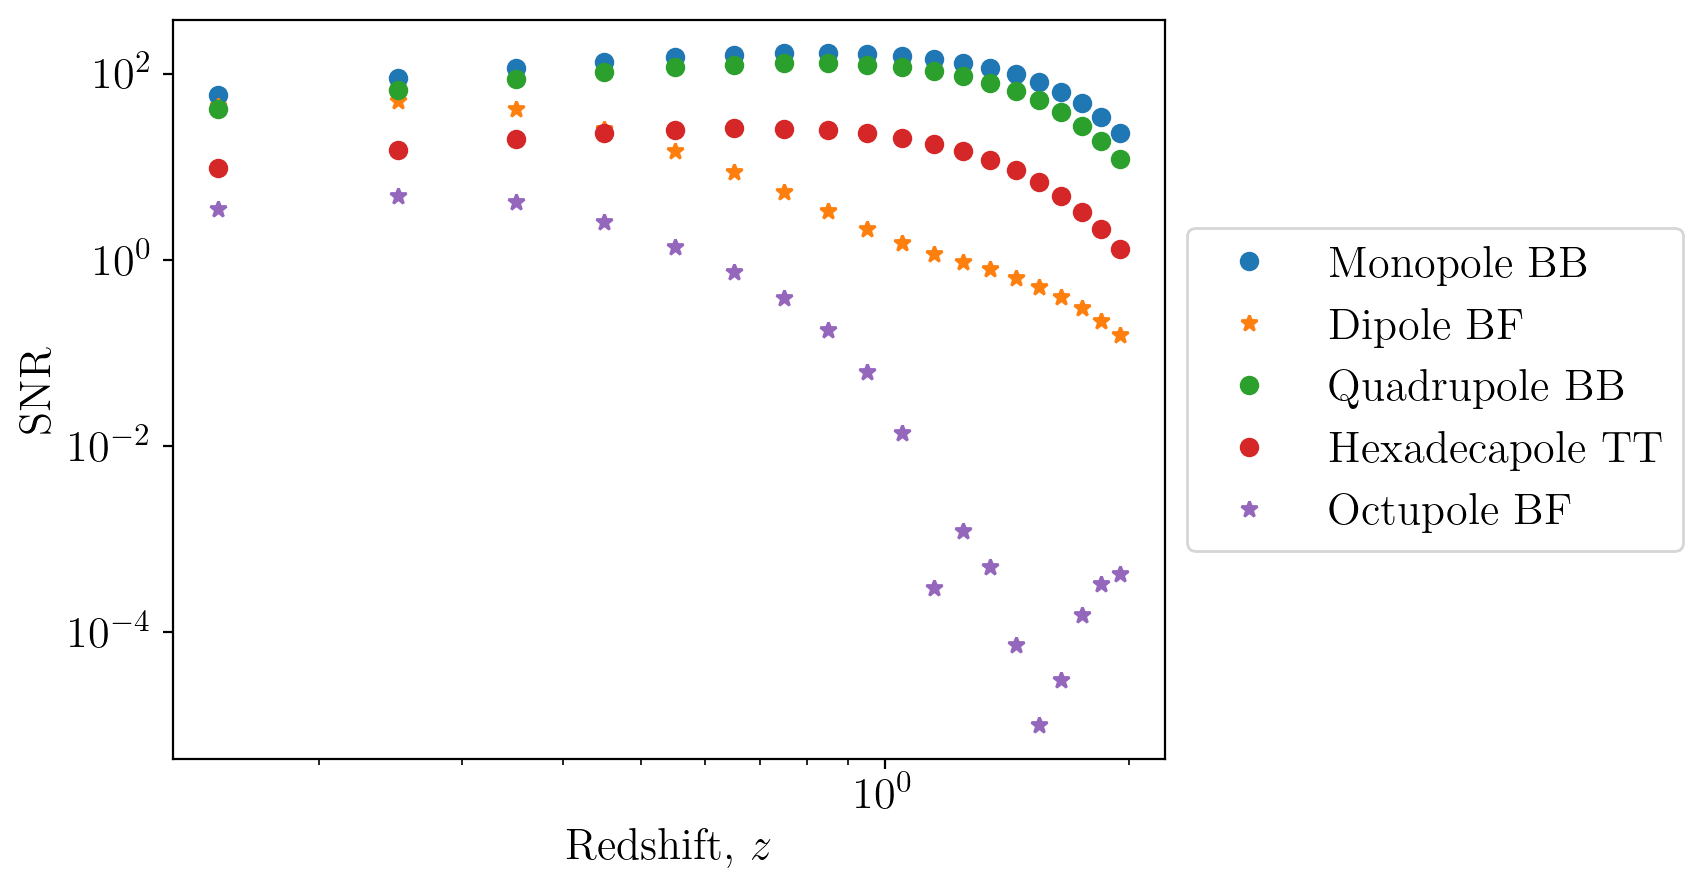

In [18]:
# Plot individual SNRs

plt.plot(z_bins, snr_monoBB, 'o', label=r'Monopole BB')
plt.plot(z_bins, snr_dipole, '*', label=r'Dipole BF')
plt.plot(z_bins, snr_quadrupoleBB, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_hexadecapole, 'o', label=r'Hexadecapole TT')
plt.plot(z_bins, snr_octupole, '*', label=r'Octupole BF')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

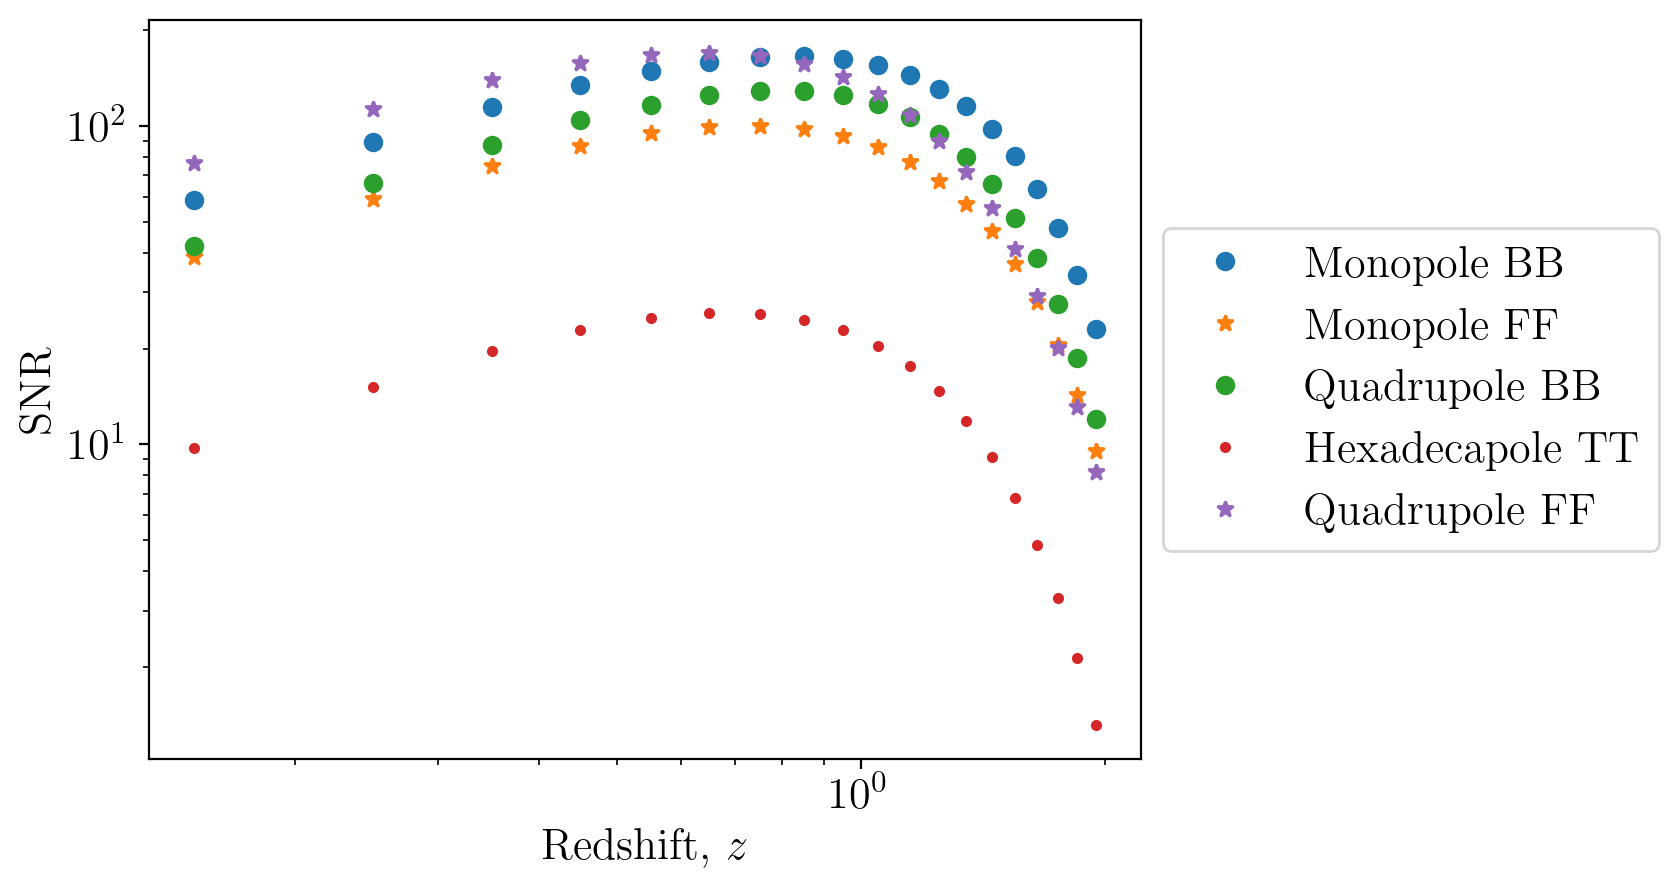

In [19]:
# Plot individual SNRs even multipoles

plt.plot(z_bins, snr_monoBB, 'o', label=r'Monopole BB')
plt.plot(z_bins, snr_monoFF, '*', label=r'Monopole FF')
plt.plot(z_bins, snr_quadrupoleBB, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_hexadecapole, '.', label=r'Hexadecapole TT')
plt.plot(z_bins, snr_quadrupoleFF, '*', label=r'Quadrupole FF')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

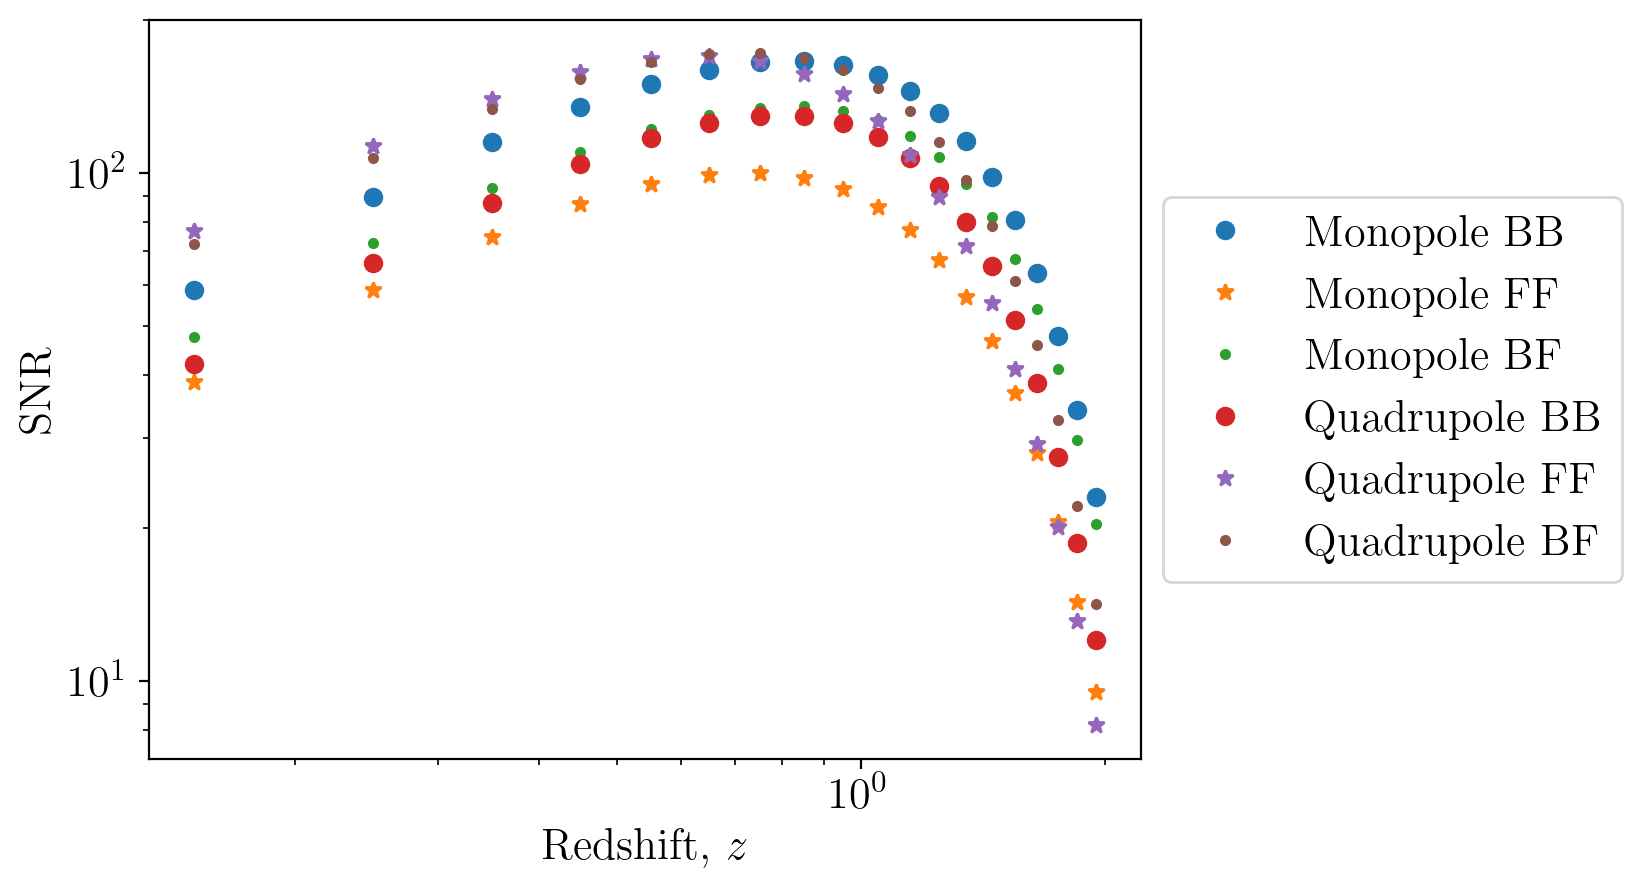

In [20]:
# Plot individual SNRs even multipoles

plt.plot(z_bins, snr_monoBB, 'o', label=r'Monopole BB')
plt.plot(z_bins, snr_monoFF, '*', label=r'Monopole FF')
plt.plot(z_bins, snr_monoBF, '.', label=r'Monopole BF')
plt.plot(z_bins, snr_quadrupoleBB, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_quadrupoleFF, '*', label=r'Quadrupole FF')
plt.plot(z_bins, snr_quadrupoleBF, '.', label=r'Quadrupole BF')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# S/N for $m=10/3$ 

Compute signals for a given split

In [21]:
m_split = 10/3

mySolver = Solver(zs=[0.0], **params_dict0, NonLin=False, silent=True)
mySignals_I = Signal(solver=mySolver, n_split=m_split, which_multipoles=['monopole', 'dipole', 'quadrupole', 'hexadecapole', 'octupole'], wide_angle=False, evol_bias=False, return_lists=True)

multipoles_signals_I = mySignals_I.calculate_signal(d = dist[0], z = z_bins)

In [22]:
np.shape(multipoles_signals_I)

(9, 19, 36)

In [23]:
monopoleBB_I = multipoles_signals_I[0]
monopoleBF_I = multipoles_signals_I[1]
monopoleFF_I = multipoles_signals_I[2]
dipoleBF_I = multipoles_signals_I[3]
quadrupoleBB_I = multipoles_signals_I[4]
quadrupoleBF_I = multipoles_signals_I[5]
quadrupoleFF_I = multipoles_signals_I[6]
hexadecapoleTT_I = multipoles_signals_I[7]
octupoleBF_I = multipoles_signals_I[8]

Import variances of the observables

In [24]:
CovMatrix_all_I = np.array(fm.cov_matrix_survey(d = dist[0], z_bins = z_bins, small_off_diagonal=True, split=[30,70]))

np.shape(CovMatrix_all_I)


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 30% BRIGHT - 70% FAINT 


 ... Success! ... 



(19, 324, 324)

In [25]:
n_sep = len(monopoleBB[0])

print(f'Separations per multipole = {n_sep}')

Separations per multipole = 36


In [26]:
n_multipoles = len(multipoles_signals)

CovMatrix_monoBB_I = CovMatrix_all_I[:, :36, :36]
CovMatrix_monoBF_I = CovMatrix_all_I[:, int(36):int(2*36), int(36):int(2*36)]
CovMatrix_monoFF_I = CovMatrix_all_I[:, int(2*36):int(3*36), int(2*36):int(3*36)]
CovMatrix_dipBF_I = CovMatrix_all_I[:, int(3*36):int(4*36), int(3*36):int(4*36)]
CovMatrix_quadBB_I = CovMatrix_all_I[:, int(4*36):int(5*36), int(4*36):int(5*36)]
CovMatrix_quadBF_I = CovMatrix_all_I[:, int(5*36):int(6*36), int(5*36):int(6*36)]
CovMatrix_quadFF_I = CovMatrix_all_I[:, int(6*36):int(7*36), int(6*36):int(7*36)]
CovMatrix_hexaTT_I = CovMatrix_all_I[:, int(7*36):int(8*36), int(7*36):int(8*36)]
CovMatrix_octBF_I = CovMatrix_all_I[:, int(8*36):, int(8*36):]

np.shape(CovMatrix_monoBB_I), np.shape(CovMatrix_dipBF_I), np.shape(CovMatrix_quadBB_I), np.shape(CovMatrix_hexaTT_I), np.shape(CovMatrix_octBF_I), np.shape(CovMatrix_monoFF_I), np.shape(CovMatrix_quadFF_I)


((19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36))

In [27]:
cumsnr_monoBB_I, snr_monoBB_I = fm.signal_to_noise(signal = monopoleBB_I, cov = CovMatrix_monoBB_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 50.284838423772044
Bin 2: 77.28855640087508
Bin 3: 99.94991139420466
Bin 4: 118.15594843574094
Bin 5: 131.90707436192955
Bin 6: 141.34273823582456
Bin 7: 146.51207088169446
Bin 8: 147.5614969372116
Bin 9: 144.5823532032652
Bin 10: 137.71959022462508
Bin 11: 127.55258923300623
Bin 12: 114.5924383451801
Bin 13: 99.56396119788955
Bin 14: 83.59641234859141
Bin 15: 67.28090253708356
Bin 16: 51.84137034474202
Bin 17: 38.08317873787215
Bin 18: 26.452838693847397
Bin 19: 17.359851778934615

--------------------------------------------------

 Cumulative SNR : 457.0658542209305 

--------------------------------------------------


In [28]:
cumsnr_monoFF_I, snr_monoFF_I = fm.signal_to_noise(signal = monopoleFF_I, cov = CovMatrix_monoFF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 56.793236222558924
Bin 2: 83.86870204216507
Bin 3: 104.75391941614944
Bin 4: 119.9869180959044
Bin 5: 130.03607213503471
Bin 6: 135.50243107276162
Bin 7: 136.76159262633024
Bin 8: 134.31137263592424
Bin 9: 128.5330679364497
Bin 10: 119.83100486042423
Bin 11: 108.98130104642448
Bin 12: 96.52139447393965
Bin 13: 83.0697435791585
Bin 14: 69.48865598078294
Bin 15: 56.066645465828564
Bin 16: 43.62069509204718
Bin 17: 32.6046122395695
Bin 18: 23.22074464706243
Bin 19: 15.732550417703202

--------------------------------------------------

 Cumulative SNR : 422.3056132995981 

--------------------------------------------------


In [29]:
cumsnr_monoBF_I, snr_monoBF_I = fm.signal_to_noise(signal = monopoleBF_I, cov = CovMatrix_monoBF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 54.967245132649445
Bin 2: 82.62614138890059
Bin 3: 105.00781552171205
Bin 4: 122.4688640645437
Bin 5: 135.34630725107223
Bin 6: 144.01298996701172
Bin 7: 148.6811215438595
Bin 8: 149.59685048664227
Bin 9: 146.91149490194093
Bin 10: 140.78174643042496
Bin 11: 131.70228757661513
Bin 12: 120.05663106871125
Bin 13: 106.36983124641155
Bin 14: 91.51757873268885
Bin 15: 75.88197608141257
Bin 16: 60.504932865308774
Bin 17: 46.13720985777868
Bin 18: 33.30318401220538
Bin 19: 22.67177575165194

--------------------------------------------------

 Cumulative SNR : 474.80486172098716 

--------------------------------------------------


In [30]:
cumsnr_dipole_I, snr_dipole_I = fm.signal_to_noise(signal = dipoleBF_I, cov = CovMatrix_dipBF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 64.65290788427305
Bin 2: 43.19224120049164
Bin 3: 32.706433949607195
Bin 4: 22.248078724680465
Bin 5: 13.591777419830544
Bin 6: 8.001870601902175
Bin 7: 4.776140746590143
Bin 8: 3.0591167125079783
Bin 9: 2.1122626618616853
Bin 10: 1.5469561557118223
Bin 11: 1.17864988559691
Bin 12: 0.9209390101237515
Bin 13: 0.7315412322663454
Bin 14: 0.5876560007579057
Bin 15: 0.4677361988097503
Bin 16: 0.366783700251567
Bin 17: 0.28093747634215765
Bin 18: 0.20768711082670663
Bin 19: 0.14701542875475046

--------------------------------------------------

 Cumulative SNR : 88.89129109502679 

--------------------------------------------------


In [31]:
cumsnr_quadrupoleBB_I, snr_quadrupoleBB_I = fm.signal_to_noise(signal = quadrupoleBB_I, cov = CovMatrix_quadBB_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 32.352238869260695
Bin 2: 51.74546893117384
Bin 3: 68.86280857389598
Bin 4: 83.01843917663093
Bin 5: 93.80605250957368
Bin 6: 101.0793566295491
Bin 7: 104.74520316637197
Bin 8: 104.87684661598415
Bin 9: 101.58316162235799
Bin 10: 95.08719652834087
Bin 11: 86.02071218777259
Bin 12: 75.01267133057777
Bin 13: 62.87259689885735
Bin 14: 50.657134941020935
Bin 15: 38.94114970575805
Bin 16: 28.586225432948286
Bin 17: 19.995417785692943
Bin 18: 13.235600872802907
Bin 19: 8.294612437024698

--------------------------------------------------

 Cumulative SNR : 313.4157000344612 

--------------------------------------------------


In [32]:
cumsnr_quadrupoleFF_I, snr_quadrupoleFF_I = fm.signal_to_noise(signal = quadrupoleFF_I, cov = CovMatrix_quadFF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 81.1819663198779
Bin 2: 119.59940744737438
Bin 3: 148.41958107524718
Bin 4: 168.32562509530806
Bin 5: 180.06027618390988
Bin 6: 184.61513992590784
Bin 7: 182.74048803025963
Bin 8: 175.37833500931026
Bin 9: 163.34932137863157
Bin 10: 147.53891567297978
Bin 11: 129.34446359127787
Bin 12: 109.8412375463409
Bin 13: 90.15629705272987
Bin 14: 71.58232465243407
Bin 15: 54.57953789057572
Bin 16: 40.01339862886101
Bin 17: 28.140453567197024
Bin 18: 18.847216643901614
Bin 19: 12.014865838146651

--------------------------------------------------

 Cumulative SNR : 546.1519773137306 

--------------------------------------------------


In [33]:
cumsnr_quadrupoleBF_I, snr_quadrupoleBF_I = fm.signal_to_noise(signal = quadrupoleBF_I, cov = CovMatrix_quadBF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 60.00418666854489
Bin 2: 90.75101527318233
Bin 3: 115.3837113610881
Bin 4: 134.00392820777836
Bin 5: 146.89428373150534
Bin 6: 154.4904534265175
Bin 7: 157.13817624804287
Bin 8: 155.25612155243792
Bin 9: 149.19224066482138
Bin 10: 139.32449321915152
Bin 11: 126.41751782363524
Bin 12: 111.15769614980375
Bin 13: 94.40895389903747
Bin 14: 77.3766982979061
Bin 15: 60.7207889786996
Bin 16: 45.59652577875403
Bin 17: 32.65714252965383
Bin 18: 22.135061039483745
Bin 19: 14.179870058310481

--------------------------------------------------

 Cumulative SNR : 479.3533609198893 

--------------------------------------------------


In [34]:
cumsnr_hexadecapole_I, snr_hexadecapole_I = fm.signal_to_noise(signal = hexadecapoleTT_I, cov = CovMatrix_hexaTT_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 9.737941761672076
Bin 2: 15.178917176168873
Bin 3: 19.601247735384497
Bin 4: 22.847725887112308
Bin 5: 24.886038405850286
Bin 6: 25.78523726548884
Bin 7: 25.640417834426007
Bin 8: 24.594623845406126
Bin 9: 22.793926363448822
Bin 10: 20.399833863249018
Bin 11: 17.642289482109522
Bin 12: 14.714883306870513
Bin 13: 11.812391212334731
Bin 14: 9.137023343368382
Bin 15: 6.767288960464975
Bin 16: 4.809308205487515
Bin 17: 3.275173515287866
Bin 18: 2.1233407612502457
Bin 19: 1.3094320947528206

--------------------------------------------------

 Cumulative SNR : 74.5007536282539 

--------------------------------------------------


In [35]:
cumsnr_octupole_I, snr_octupole_I = fm.signal_to_noise(signal = octupoleBF_I, cov = CovMatrix_octBF_I, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 8.99459982716004
Bin 2: 4.09606872780365
Bin 3: 3.0862131375942066
Bin 4: 2.1467667608532994
Bin 5: 1.278751363133515
Bin 6: 0.6802846270009475
Bin 7: 0.33483632855976186
Bin 8: 0.16450475934548017
Bin 9: 0.08131973150917708
Bin 10: 0.03937272133980485
Bin 11: 0.017234274081074353
Bin 12: 0.0059565731921890405
Bin 13: 0.0011748175676991024
Bin 14: 0.00015229921083702167
Bin 15: 0.0001489035566874179
Bin 16: 0.000234409467155576
Bin 17: 0.0005982537015505637
Bin 18: 0.0008155843672581091
Bin 19: 0.0008411020438842445

--------------------------------------------------

 Cumulative SNR : 10.679868555228456 

--------------------------------------------------


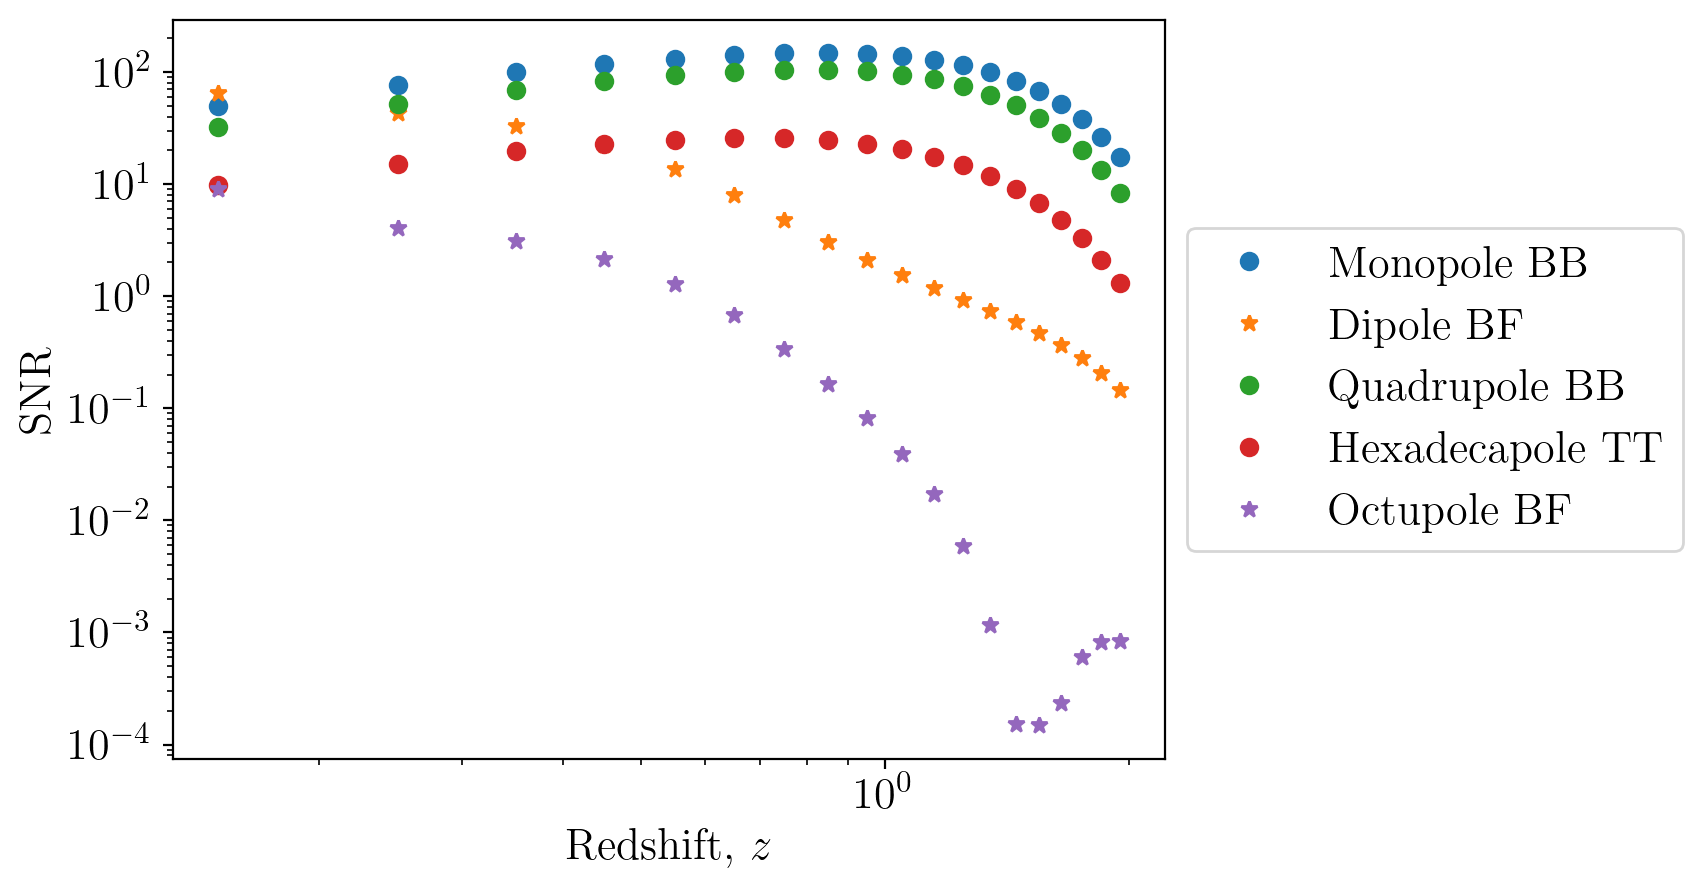

In [36]:
# Plot individual SNRs

plt.plot(z_bins, snr_monoBB_I, 'o', label=r'Monopole BB')
plt.plot(z_bins, snr_dipole_I, '*', label=r'Dipole BF')
plt.plot(z_bins, snr_quadrupoleBB_I, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_hexadecapole_I, 'o', label=r'Hexadecapole TT')
plt.plot(z_bins, snr_octupole_I, '*', label=r'Octupole BF')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

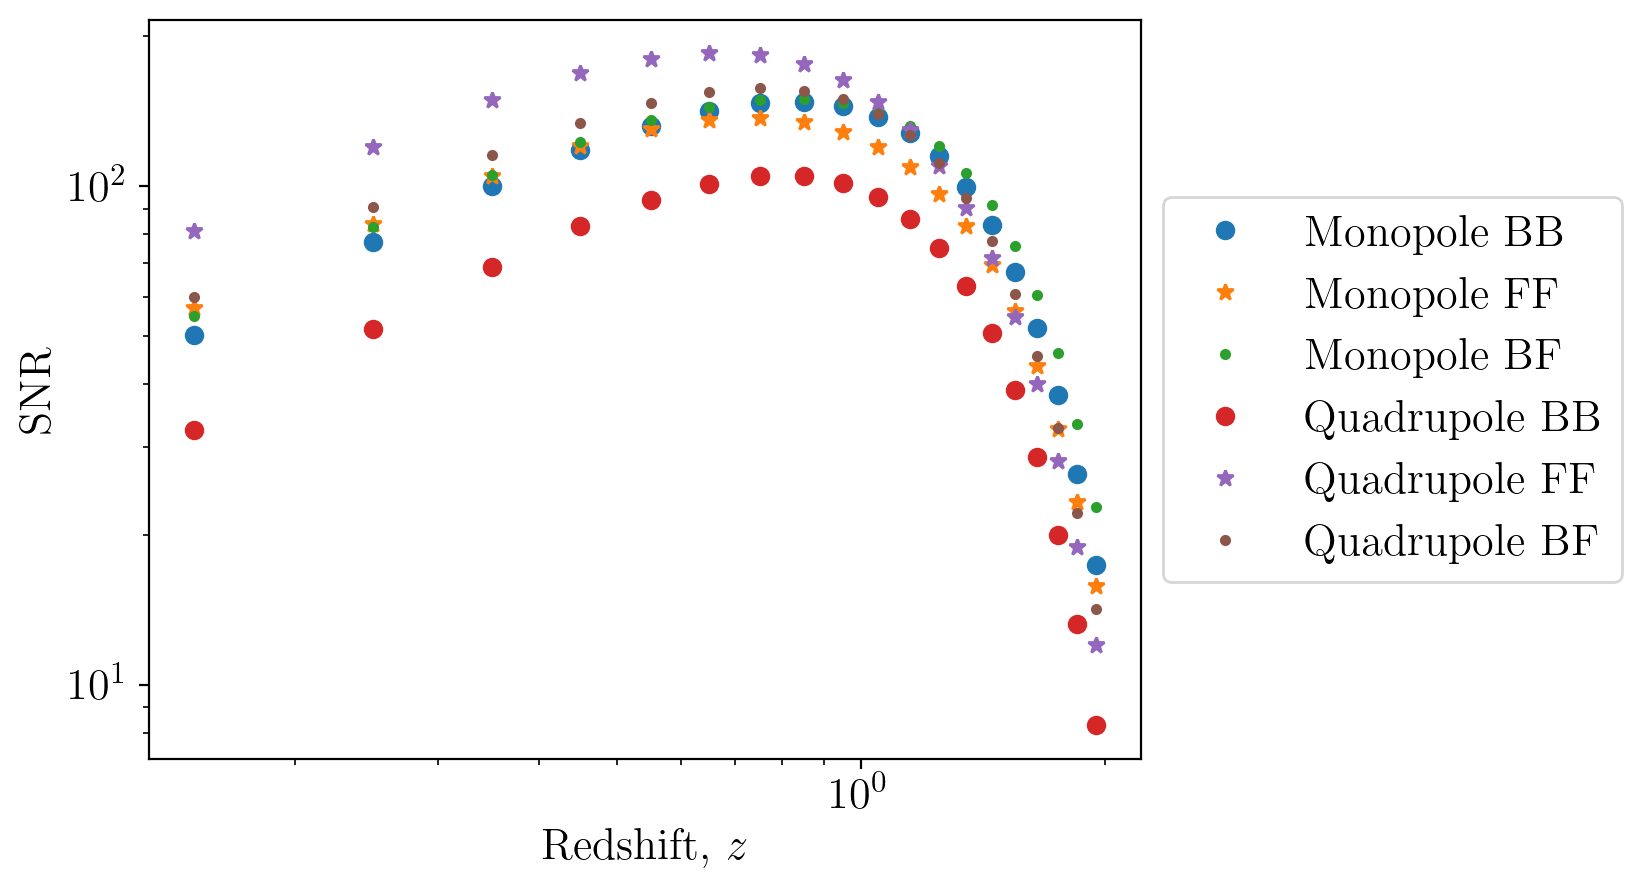

In [37]:
# Plot individual SNRs even multipoles

plt.plot(z_bins, snr_monoBB_I, 'o', label=r'Monopole BB')
plt.plot(z_bins, snr_monoFF_I, '*', label=r'Monopole FF')
plt.plot(z_bins, snr_monoBF_I, '.', label=r'Monopole BF')
plt.plot(z_bins, snr_quadrupoleBB_I, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_quadrupoleFF_I, '*', label=r'Quadrupole FF')
plt.plot(z_bins, snr_quadrupoleBF_I, '.', label=r'Quadrupole BF')


plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

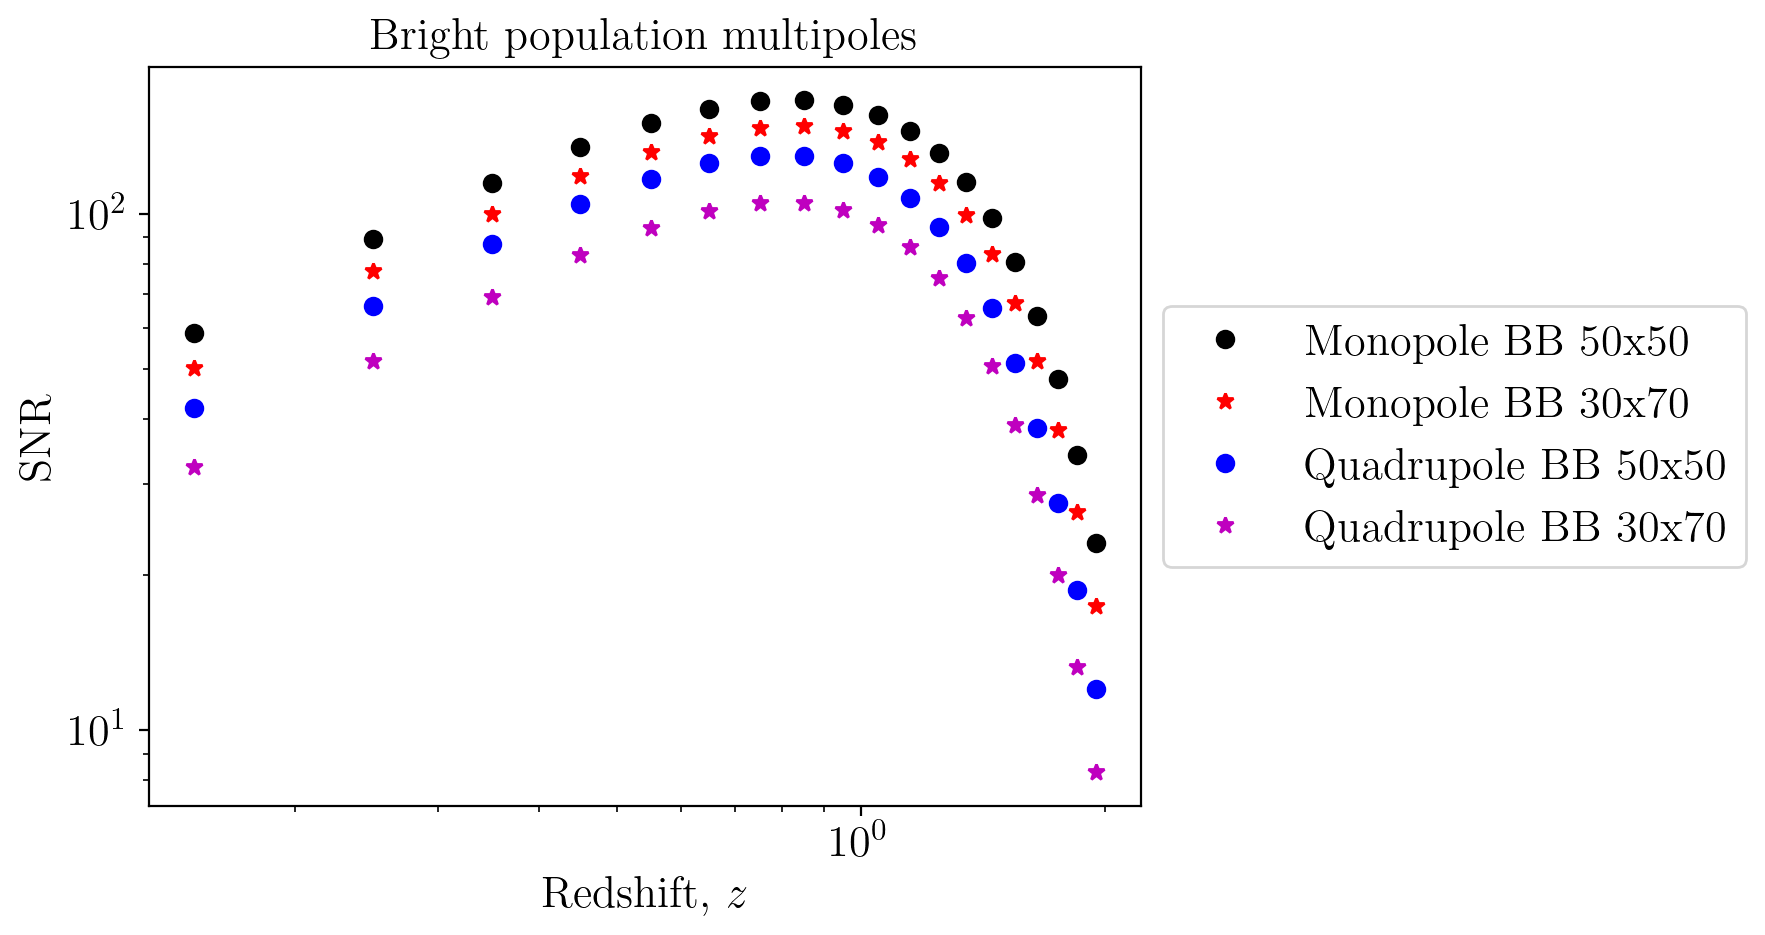

In [38]:
plt.plot(z_bins, snr_monoBB, 'ko', label=r'Monopole BB 50x50')
plt.plot(z_bins, snr_monoBB_I, 'r*', label=r'Monopole BB 30x70')
plt.plot(z_bins, snr_quadrupoleBB, 'bo', label=r'Quadrupole BB 50x50')
plt.plot(z_bins, snr_quadrupoleBB_I, 'm*', label=r'Quadrupole BB 30x70')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Bright population multipoles');

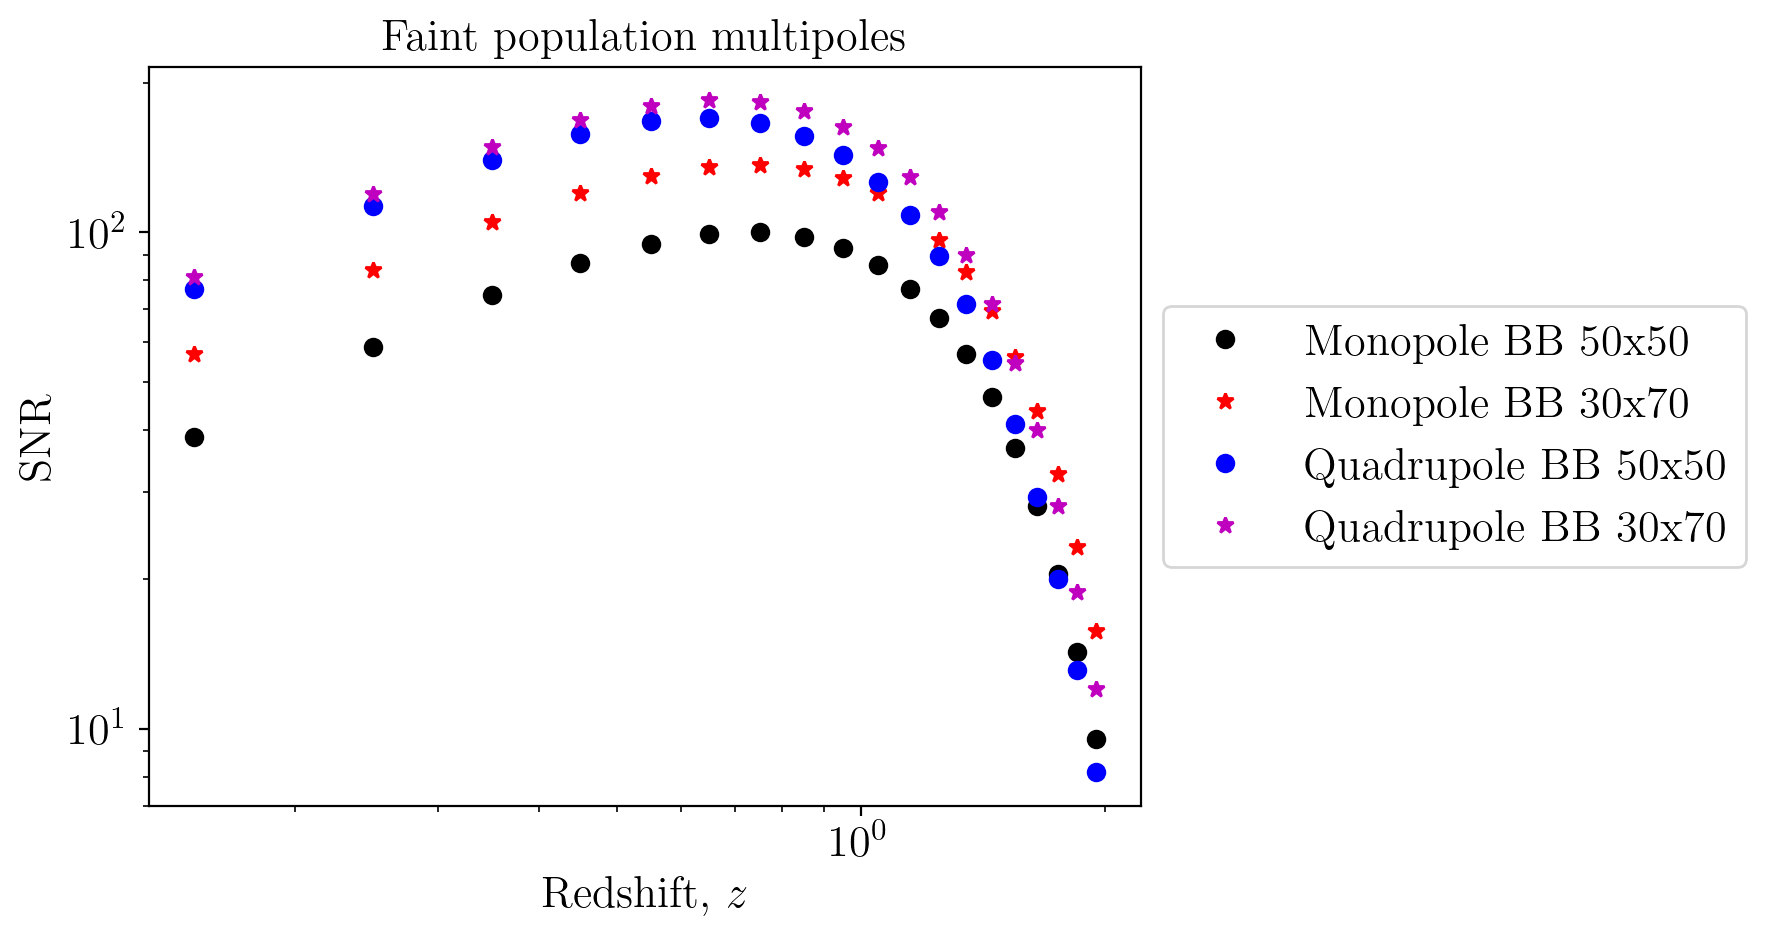

In [39]:
plt.plot(z_bins, snr_monoFF, 'ko', label=r'Monopole BB 50x50')
plt.plot(z_bins, snr_monoFF_I, 'r*', label=r'Monopole BB 30x70')
plt.plot(z_bins, snr_quadrupoleFF, 'bo', label=r'Quadrupole BB 50x50')
plt.plot(z_bins, snr_quadrupoleFF_I, 'm*', label=r'Quadrupole BB 30x70')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Faint population multipoles');

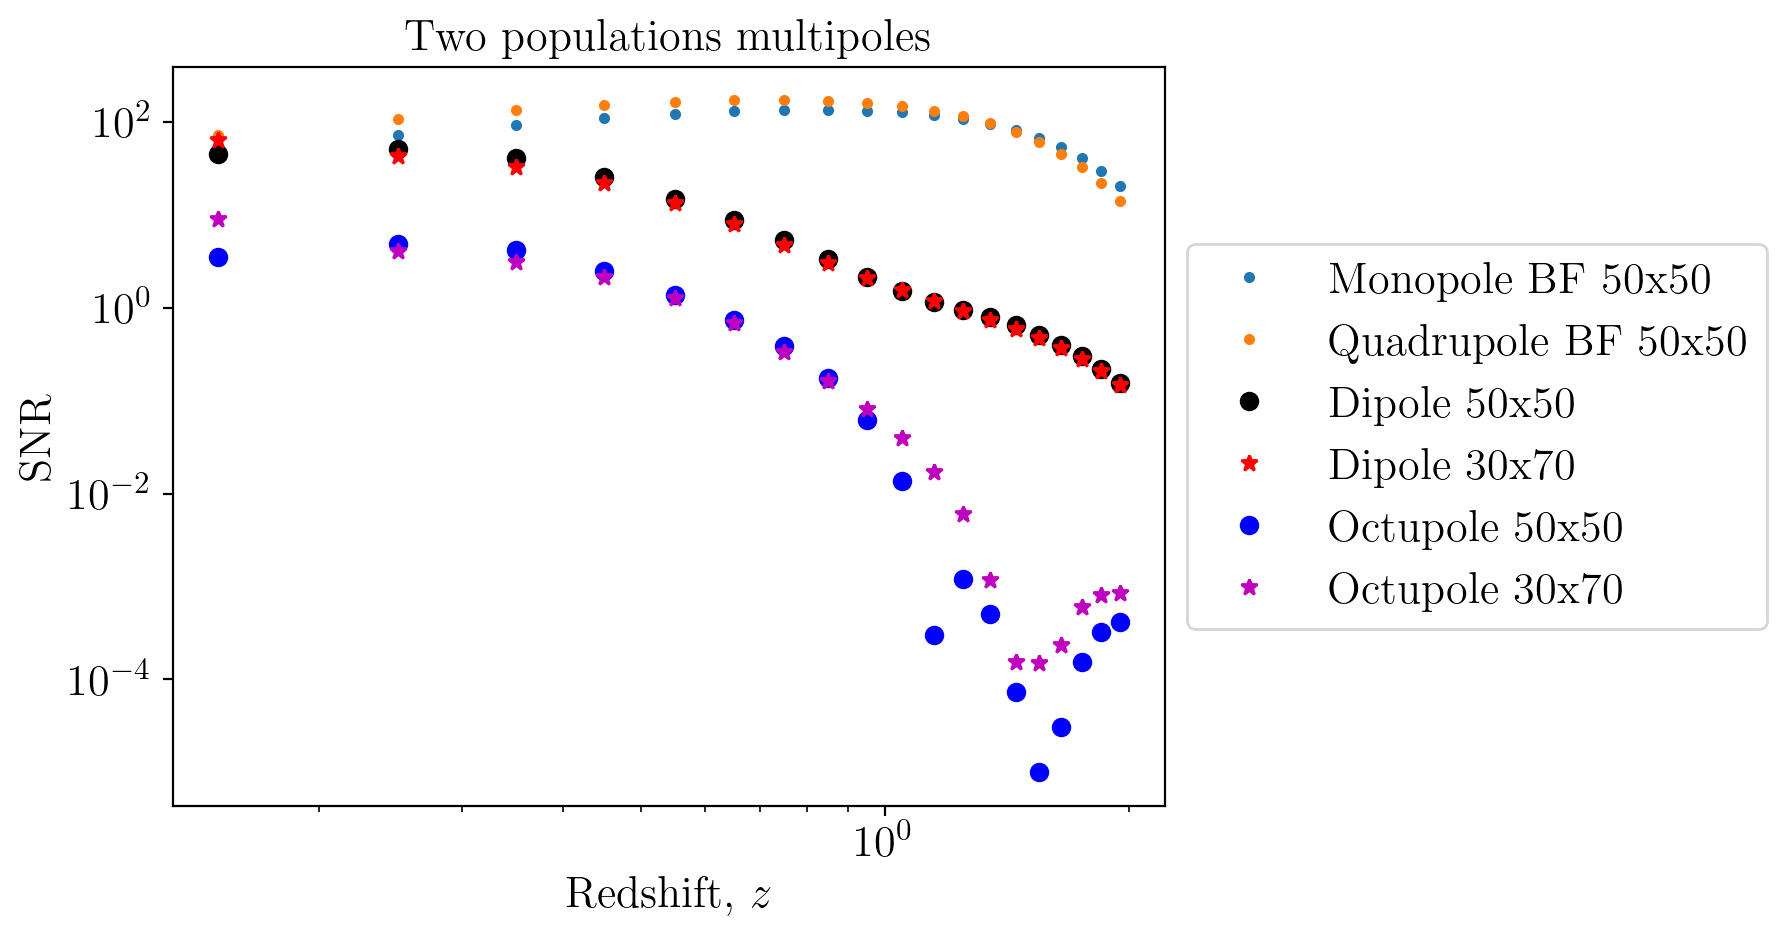

In [40]:
plt.plot(z_bins, snr_monoBF, '.', label=r'Monopole BF 50x50')
plt.plot(z_bins, snr_quadrupoleBF, '.', label=r'Quadrupole BF 50x50')
plt.plot(z_bins, snr_dipole, 'ko', label=r'Dipole 50x50')
plt.plot(z_bins, snr_dipole_I, 'r*', label=r'Dipole 30x70')
plt.plot(z_bins, snr_octupole, 'bo', label=r'Octupole 50x50')
plt.plot(z_bins, snr_octupole_I, 'm*', label=r'Octupole 30x70')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Two populations multipoles');

# S/N for $m=10/7$ 

Compute signals for a given split

In [41]:
m_split = 10/7

mySolver = Solver(zs=[0.0], **params_dict0, NonLin=False, silent=True)
mySignals_II = Signal(solver=mySolver, n_split=m_split, which_multipoles=['monopole', 'dipole', 'quadrupole', 'hexadecapole', 'octupole'], wide_angle=False, evol_bias=False, return_lists=True)

multipoles_signals_II = mySignals_II.calculate_signal(d = dist[0], z = z_bins)

In [42]:
np.shape(multipoles_signals_II)

(9, 19, 36)

In [43]:
monopoleBB_II = multipoles_signals_II[0]
monopoleBF_II = multipoles_signals_II[1]
monopoleFF_II = multipoles_signals_II[2]
dipoleBF_II = multipoles_signals_II[3]
quadrupoleBB_II = multipoles_signals_II[4]
quadrupoleBF_II = multipoles_signals_II[5]
quadrupoleFF_II = multipoles_signals_II[6]
hexadecapoleTT_II = multipoles_signals_II[7]
octupoleBF_II = multipoles_signals_II[8]

Import variances of the observables

In [44]:
CovMatrix_all_II = np.array(fm.cov_matrix_survey(d = dist[0], z_bins = z_bins, small_off_diagonal=True, split=[70,30]))

np.shape(CovMatrix_all)


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 70% BRIGHT - 30% FAINT 


 ... Success! ... 



(19, 324, 324)

In [45]:
n_sep = len(monopoleBB_II[0])

print(f'Separations per multipole = {n_sep}')

Separations per multipole = 36


In [46]:
n_multipoles = len(multipoles_signals)

CovMatrix_monoBB_II = CovMatrix_all_II[:, :36, :36]
CovMatrix_monoBF_II = CovMatrix_all_II[:, int(36):int(2*36), int(36):int(2*36)]
CovMatrix_monoFF_II = CovMatrix_all_II[:, int(2*36):int(3*36), int(2*36):int(3*36)]
CovMatrix_dipBF_II = CovMatrix_all_II[:, int(3*36):int(4*36), int(3*36):int(4*36)]
CovMatrix_quadBB_II = CovMatrix_all_II[:, int(4*36):int(5*36), int(4*36):int(5*36)]
CovMatrix_quadBF_II = CovMatrix_all_II[:, int(5*36):int(6*36), int(5*36):int(6*36)]
CovMatrix_quadFF_II = CovMatrix_all_II[:, int(6*36):int(7*36), int(6*36):int(7*36)]
CovMatrix_hexaTT_II = CovMatrix_all_II[:, int(7*36):int(8*36), int(7*36):int(8*36)]
CovMatrix_octBF_II = CovMatrix_all_II[:, int(8*36):, int(8*36):]

np.shape(CovMatrix_monoBB_II), np.shape(CovMatrix_dipBF_II), np.shape(CovMatrix_quadBB_II), np.shape(CovMatrix_hexaTT_II), np.shape(CovMatrix_octBF_II), np.shape(CovMatrix_monoFF_II), np.shape(CovMatrix_quadFF_II)


((19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36),
 (19, 36, 36))

In [47]:
cumsnr_monoBB_II, snr_monoBB_II = fm.signal_to_noise(signal = monopoleBB_II, cov = CovMatrix_monoBB_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 63.75163382926832
Bin 2: 96.16763858860196
Bin 3: 122.35494240493131
Bin 4: 142.63506796514466
Bin 5: 157.38717174493303
Bin 6: 167.06874632020046
Bin 7: 171.98548962453097
Bin 8: 172.49082656782616
Bin 9: 168.83139373355394
Bin 10: 161.24864740547696
Bin 11: 150.34525536531936
Bin 12: 136.59429102505288
Bin 13: 120.62963542982766
Bin 14: 103.47702979431858
Bin 15: 85.61103979051316
Bin 16: 68.21347049634075
Bin 17: 52.107987846373916
Bin 18: 37.81745212611779
Bin 19: 25.981558316191528

--------------------------------------------------

 Cumulative SNR : 546.3253605016619 

--------------------------------------------------


In [48]:
cumsnr_monoFF_II, snr_monoFF_II = fm.signal_to_noise(signal = monopoleFF_II, cov = CovMatrix_monoFF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 16.431354176388503
Bin 2: 26.219282643518618
Bin 3: 35.16048161860044
Bin 4: 42.645458467552935
Bin 5: 48.229704401500825
Bin 6: 51.82580476848062
Bin 7: 53.3380433125755
Bin 8: 52.90443549697957
Bin 9: 50.66533170589261
Bin 10: 46.849017678696576
Bin 11: 41.962769906935115
Bin 12: 36.34865540558607
Bin 13: 30.393067583685127
Bin 14: 24.585481969217167
Bin 15: 19.077358919710257
Bin 16: 14.247869758329696
Bin 17: 10.233656319419909
Bin 18: 7.0271213655312055
Bin 19: 4.624027358293836

--------------------------------------------------

 Cumulative SNR : 157.42523987196554 

--------------------------------------------------


In [49]:
cumsnr_monoBF_II, snr_monoBF_II = fm.signal_to_noise(signal = monopoleBF_II, cov = CovMatrix_monoBF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 22.255687482863504
Bin 2: 40.09840817121258
Bin 3: 56.987919683913084
Bin 4: 71.57506571935824
Bin 5: 83.22205786963826
Bin 6: 91.77392268466974
Bin 7: 97.13502227708916
Bin 8: 99.40719223267352
Bin 9: 98.68088202989208
Bin 10: 95.10895116279279
Bin 11: 89.17359103799028
Bin 12: 81.23547409415957
Bin 13: 71.76777574155246
Bin 14: 61.5021688274901
Bin 15: 50.737883572828565
Bin 16: 40.26614406361796
Bin 17: 30.610201687602352
Bin 18: 22.092884418451032
Bin 19: 15.107330282211471

--------------------------------------------------

 Cumulative SNR : 305.3785763223855 

--------------------------------------------------


In [50]:
cumsnr_dipole_II, snr_dipole_II = fm.signal_to_noise(signal = dipoleBF_II, cov = CovMatrix_dipBF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 54.00478254027803
Bin 2: 68.35901480798658
Bin 3: 46.817882919923434
Bin 4: 28.484943407901287
Bin 5: 15.446052892701843
Bin 6: 7.114706892790568
Bin 7: 3.0823918437287654
Bin 8: 1.7325040481757668
Bin 9: 1.422349424110206
Bin 10: 1.2739273998198244
Bin 11: 1.120464839123315
Bin 12: 0.949725601761904
Bin 13: 0.774107145884389
Bin 14: 0.6168773185494666
Bin 15: 0.47870992245944793
Bin 16: 0.3644403897784324
Bin 17: 0.27195161856609634
Bin 18: 0.1974314853209514
Bin 19: 0.13806904870223713

--------------------------------------------------

 Cumulative SNR : 104.41147957570581 

--------------------------------------------------


In [51]:
cumsnr_quadrupoleBB_II, snr_quadrupoleBB_II = fm.signal_to_noise(signal = quadrupoleBB_II, cov = CovMatrix_quadBB_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 51.74250923405816
Bin 2: 80.4388390235709
Bin 3: 104.47757224170748
Bin 4: 123.38938545311993
Bin 5: 137.06769719250929
Bin 6: 145.68972608272367
Bin 7: 149.4485588960055
Bin 8: 148.67651754634434
Bin 9: 143.68286092874615
Bin 10: 134.83195851766504
Bin 11: 122.87638452373568
Bin 12: 108.50356644669377
Bin 13: 92.57925627695187
Bin 14: 76.29310028215252
Bin 15: 60.2954687561775
Bin 16: 45.692902836642624
Bin 17: 33.10527285049489
Bin 18: 22.758891421993912
Bin 19: 14.819855343070861

--------------------------------------------------

 Cumulative SNR : 455.39584169134156 

--------------------------------------------------


In [52]:
cumsnr_quadrupoleFF_II, snr_quadrupoleFF_II = fm.signal_to_noise(signal = quadrupoleFF_II, cov = CovMatrix_quadFF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 40.79883444863661
Bin 2: 67.64296370130215
Bin 3: 89.92691097701932
Bin 4: 106.05345472900348
Bin 5: 115.54648074308577
Bin 6: 118.93595426363943
Bin 7: 116.74748305034137
Bin 8: 109.9999470648129
Bin 9: 99.6603372957623
Bin 10: 86.8127702800931
Bin 11: 72.96473037884535
Bin 12: 59.09931616364157
Bin 13: 46.08084875770304
Bin 14: 34.70438334088366
Bin 15: 25.045839459731802
Bin 16: 17.395376325034018
Bin 17: 11.623196209429961
Bin 18: 7.428651938744757
Bin 19: 4.553533400726679

--------------------------------------------------

 Cumulative SNR : 330.99091349634756 

--------------------------------------------------


In [53]:
cumsnr_quadrupoleBF_II, snr_quadrupoleBF_II = fm.signal_to_noise(signal = quadrupoleBF_II, cov = CovMatrix_quadBF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 72.7143364822294
Bin 2: 106.72350649431208
Bin 3: 132.3143291481245
Bin 4: 150.20957248467204
Bin 5: 161.09560311727773
Bin 6: 165.83355142812908
Bin 7: 165.02869133241515
Bin 8: 159.42961623872725
Bin 9: 149.65853881406514
Bin 10: 136.38447046082942
Bin 11: 120.73462316683042
Bin 12: 103.58678332501091
Bin 13: 85.91086568685932
Bin 14: 68.89238774543124
Bin 15: 53.00713305124479
Bin 16: 39.154319991417836
Bin 17: 27.68762810228666
Bin 18: 18.600378994721115
Bin 19: 11.861730332824157

--------------------------------------------------

 Cumulative SNR : 496.8707254828403 

--------------------------------------------------


In [54]:
cumsnr_hexadecapole_II, snr_hexadecapole_II = fm.signal_to_noise(signal = hexadecapoleTT_II, cov = CovMatrix_hexaTT_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 9.737941761672076
Bin 2: 15.178917176168873
Bin 3: 19.601247735384497
Bin 4: 22.847725887112308
Bin 5: 24.886038405850286
Bin 6: 25.78523726548884
Bin 7: 25.640417834426007
Bin 8: 24.594623845406126
Bin 9: 22.793926363448822
Bin 10: 20.399833863249018
Bin 11: 17.642289482109522
Bin 12: 14.714883306870513
Bin 13: 11.812391212334731
Bin 14: 9.137023343368382
Bin 15: 6.767288960464975
Bin 16: 4.809308205487515
Bin 17: 3.275173515287866
Bin 18: 2.1233407612502457
Bin 19: 1.3094320947528206

--------------------------------------------------

 Cumulative SNR : 74.5007536282539 

--------------------------------------------------


In [55]:
cumsnr_octupole_II, snr_octupole_II = fm.signal_to_noise(signal = octupoleBF_II, cov = CovMatrix_octBF_II, verbose = 1)


 ... Computing the S/N ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 

--------------------------------------------------

 Individual SNRs: 

Bin 1: 5.829396504935939
Bin 2: 7.295608775073462
Bin 3: 5.175766020911636
Bin 4: 3.1290753791600086
Bin 5: 1.549595969318587
Bin 6: 0.5037063981288051
Bin 7: 0.03572904070164285
Bin 8: 0.06354118065249993
Bin 9: 0.03627696867889096
Bin 10: 0.008094477645611598
Bin 11: 0.0050033288290899265
Bin 12: 0.007774085830313384
Bin 13: 0.005535341337726134
Bin 14: 0.002707172399585788
Bin 15: 0.0005710957160607183
Bin 16: 0.0004802735184642981
Bin 17: 0.0006957359729044183
Bin 18: 0.00044543605821179867
Bin 19: 0.00015141847925509712

--------------------------------------------------

 Cumulative SNR : 11.244964461114707 

--------------------------------------------------


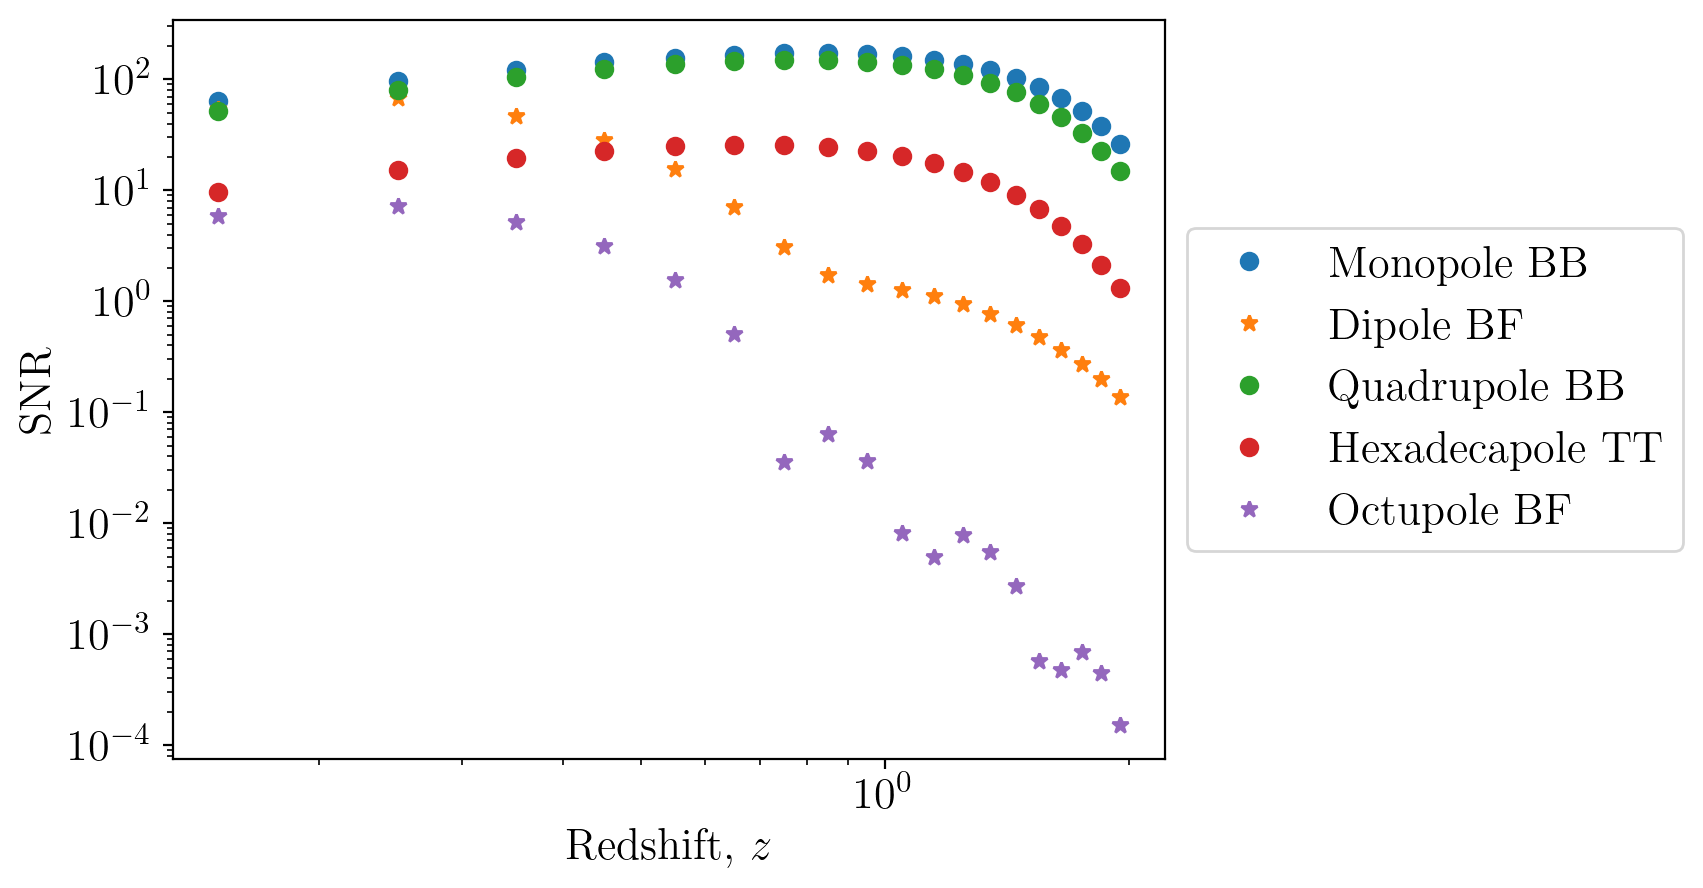

In [56]:
# Plot individual SNRs

plt.plot(z_bins, snr_monoBB_II, 'o', label=r'Monopole BB')
plt.plot(z_bins, snr_dipole_II, '*', label=r'Dipole BF')
plt.plot(z_bins, snr_quadrupoleBB_II, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_hexadecapole_II, 'o', label=r'Hexadecapole TT')
plt.plot(z_bins, snr_octupole_II, '*', label=r'Octupole BF')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

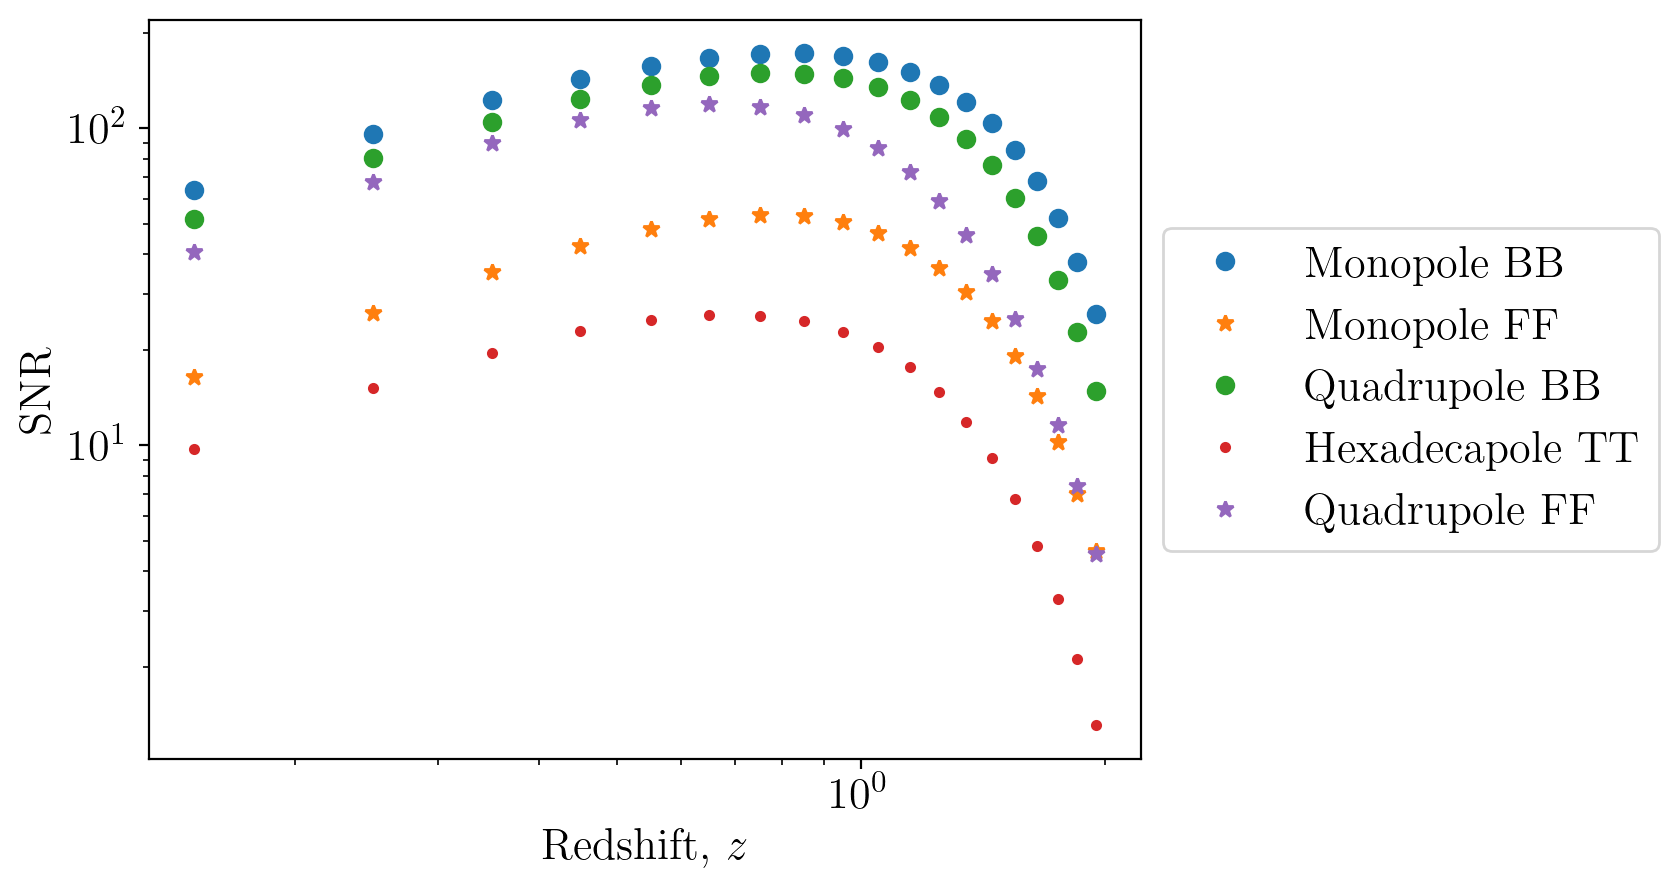

In [57]:
# Plot individual SNRs even multipoles

plt.plot(z_bins, snr_monoBB_II, 'o', label=r'Monopole BB')
plt.plot(z_bins, snr_monoFF_II, '*', label=r'Monopole FF')
plt.plot(z_bins, snr_quadrupoleBB_II, 'o', label=r'Quadrupole BB')
plt.plot(z_bins, snr_hexadecapole_II, '.', label=r'Hexadecapole TT')
plt.plot(z_bins, snr_quadrupoleFF_II, '*', label=r'Quadrupole FF')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

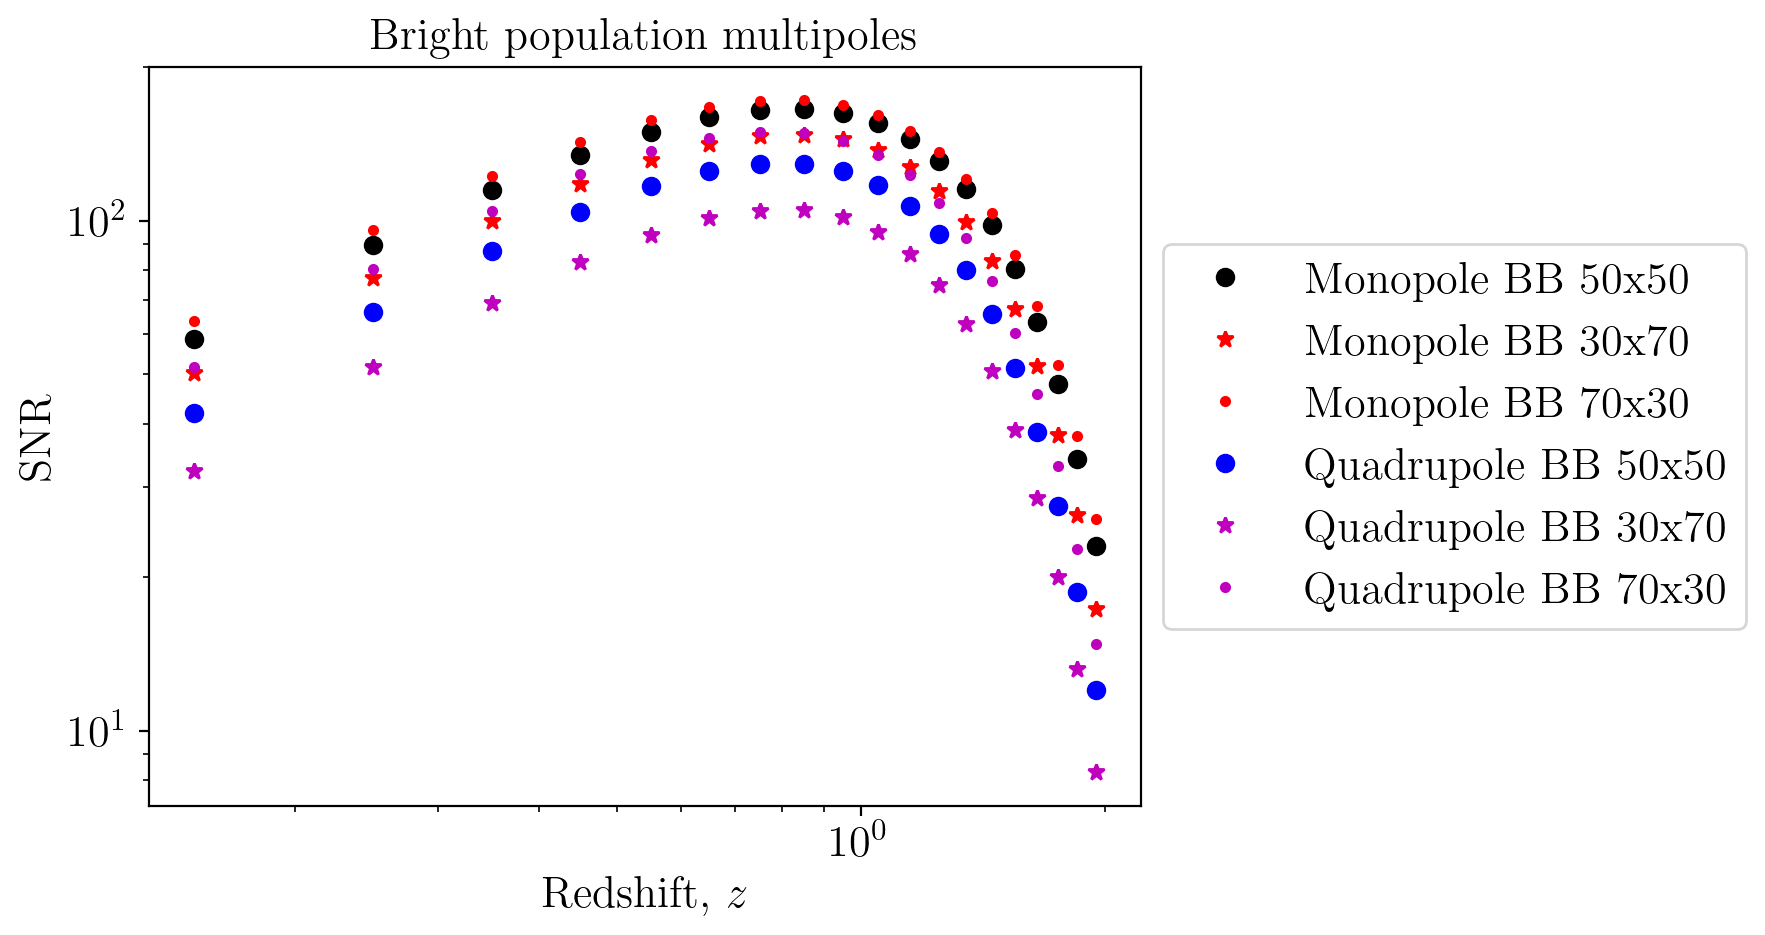

In [58]:
plt.plot(z_bins, snr_monoBB, 'ko', label=r'Monopole BB 50x50')
plt.plot(z_bins, snr_monoBB_I, 'r*', label=r'Monopole BB 30x70')
plt.plot(z_bins, snr_monoBB_II, 'r.', label=r'Monopole BB 70x30')
plt.plot(z_bins, snr_quadrupoleBB, 'bo', label=r'Quadrupole BB 50x50')
plt.plot(z_bins, snr_quadrupoleBB_I, 'm*', label=r'Quadrupole BB 30x70')
plt.plot(z_bins, snr_quadrupoleBB_II, 'm.', label=r'Quadrupole BB 70x30')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Bright population multipoles');

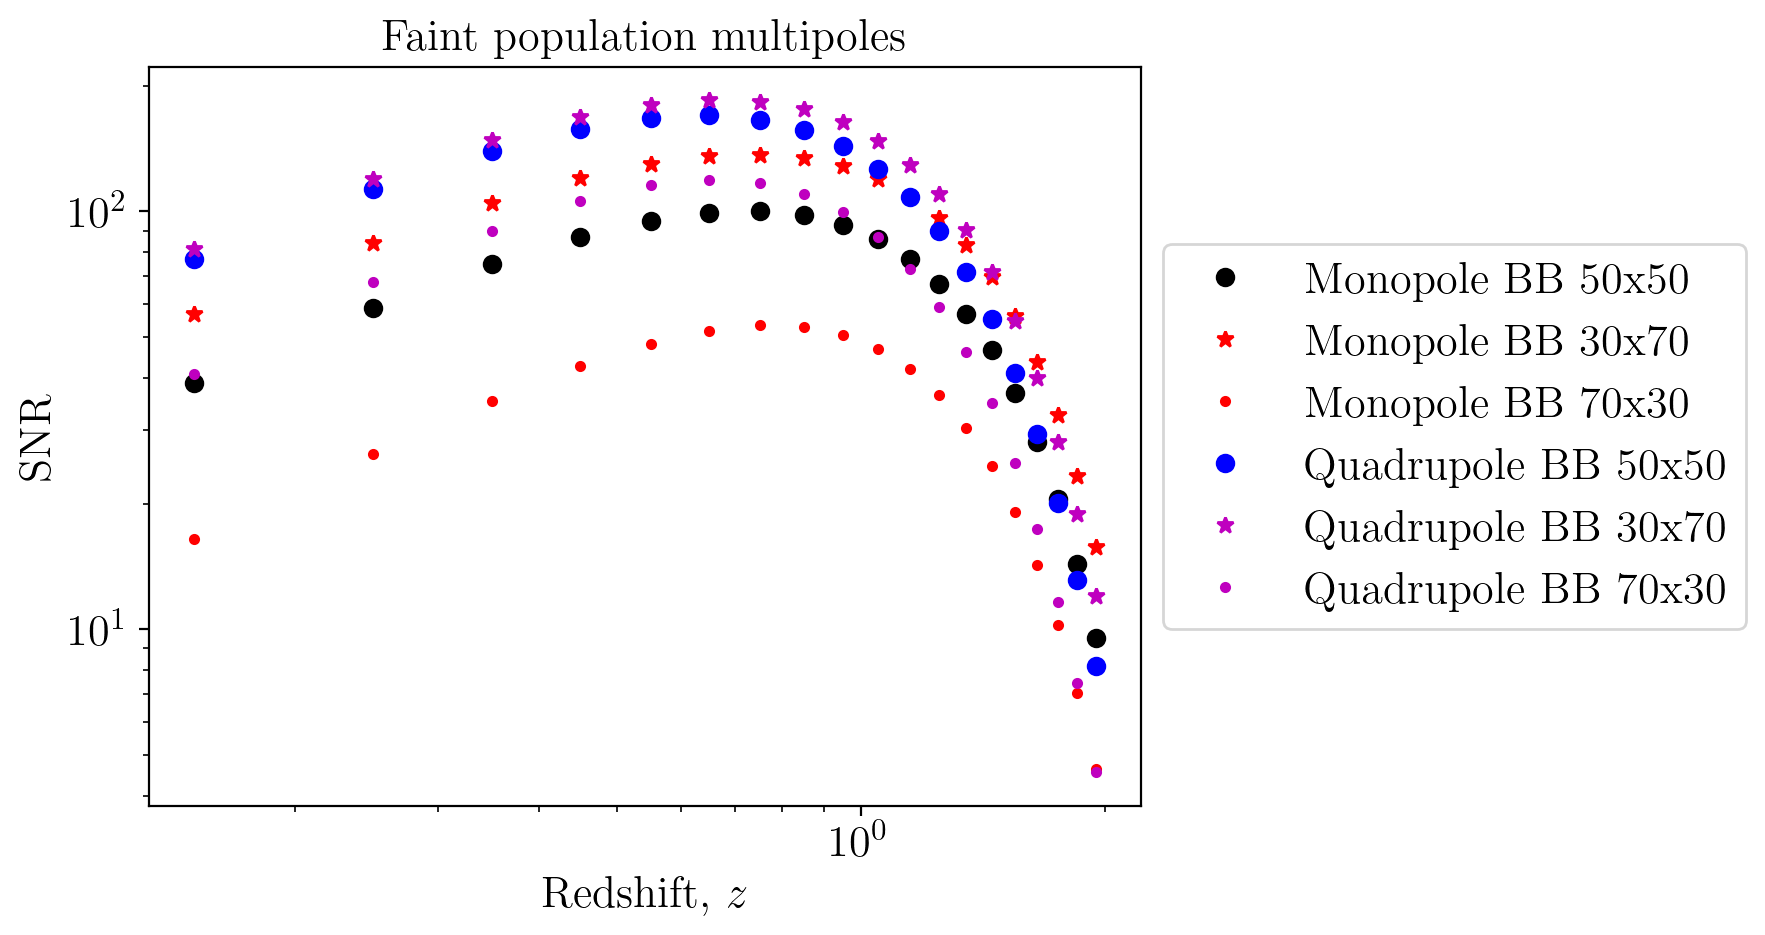

In [59]:
plt.plot(z_bins, snr_monoFF, 'ko', label=r'Monopole BB 50x50')
plt.plot(z_bins, snr_monoFF_I, 'r*', label=r'Monopole BB 30x70')
plt.plot(z_bins, snr_monoFF_II, 'r.', label=r'Monopole BB 70x30')
plt.plot(z_bins, snr_quadrupoleFF, 'bo', label=r'Quadrupole BB 50x50')
plt.plot(z_bins, snr_quadrupoleFF_I, 'm*', label=r'Quadrupole BB 30x70')
plt.plot(z_bins, snr_quadrupoleFF_II, 'm.', label=r'Quadrupole BB 70x30')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Faint population multipoles');

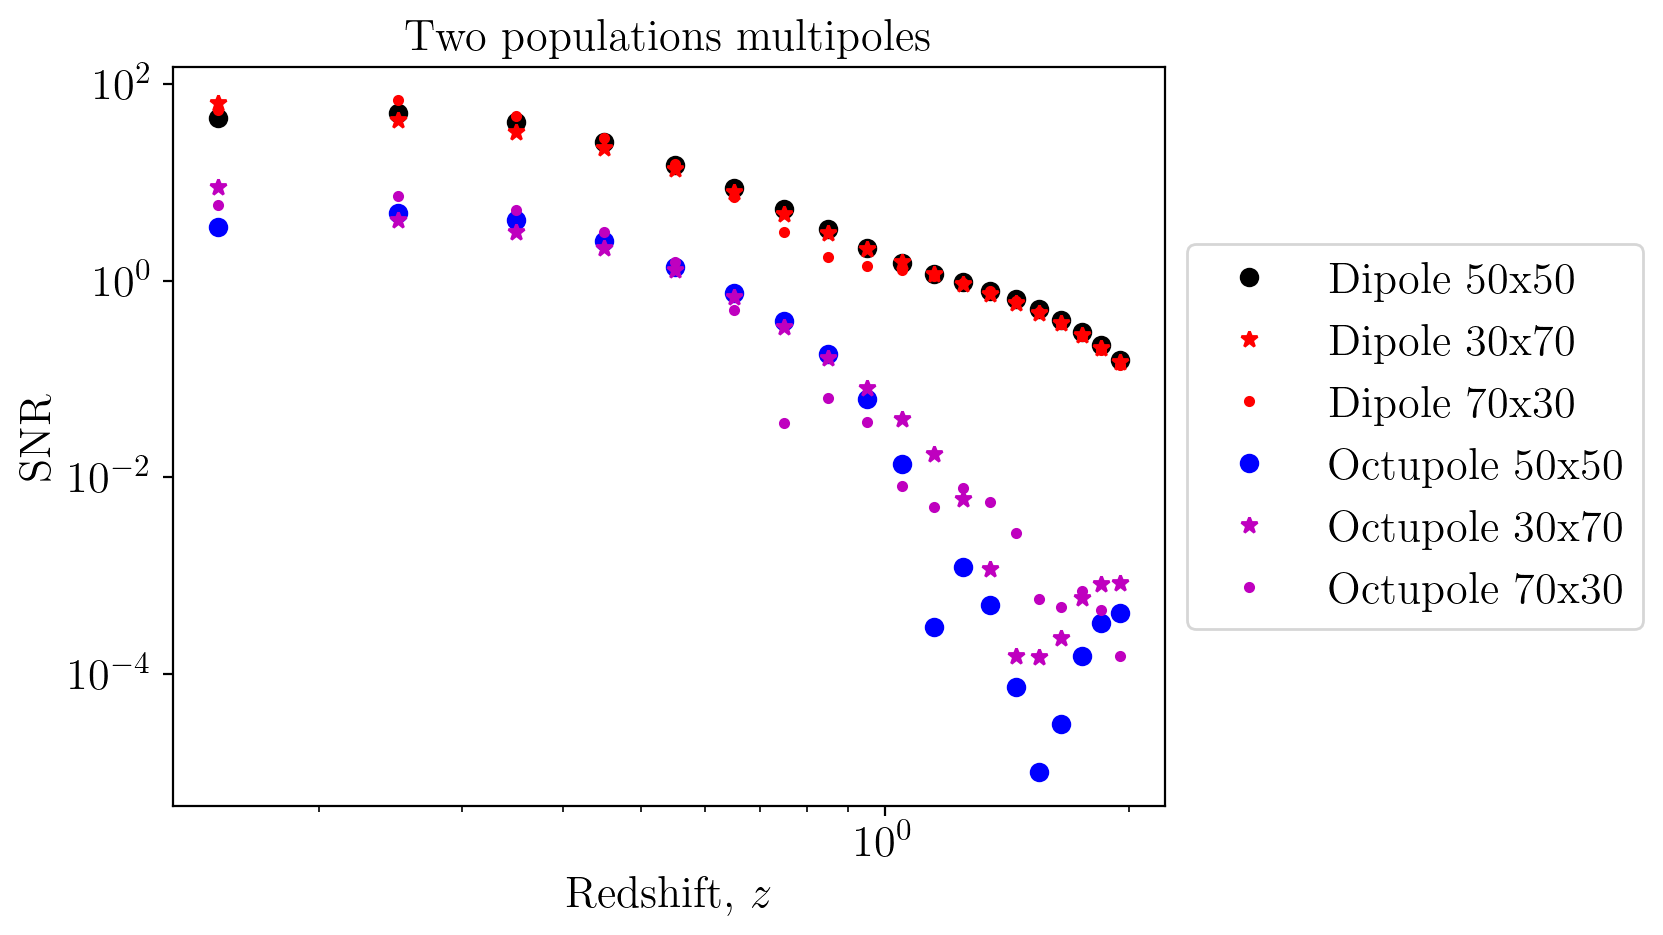

In [60]:
plt.plot(z_bins, snr_dipole, 'ko', label=r'Dipole 50x50')
plt.plot(z_bins, snr_dipole_I, 'r*', label=r'Dipole 30x70')
plt.plot(z_bins, snr_dipole_II, 'r.', label=r'Dipole 70x30')
plt.plot(z_bins, snr_octupole, 'bo', label=r'Octupole 50x50')
plt.plot(z_bins, snr_octupole_I, 'm*', label=r'Octupole 30x70')
plt.plot(z_bins, snr_octupole_II, 'm.', label=r'Octupole 70x30')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'SNR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(r'Two populations multipoles');

In [61]:
print('\n ... Cummulative SNRs ... \n')
print('Monopole BB = ', cumsnr_monoBB, cumsnr_monoBB_I, cumsnr_monoBB_II , '\n')
print('Monopole BF = ', cumsnr_monoBF, cumsnr_monoBF_I, cumsnr_monoBF_II , '\n')
print('Monopole FF = ', cumsnr_monoFF, cumsnr_monoFF_I, cumsnr_monoFF_II , '\n')
print('Quadrupole BB = ', cumsnr_quadrupoleBB, cumsnr_quadrupoleBB_I, cumsnr_quadrupoleBB_II, '\n')
print('Quadrupole BF = ', cumsnr_quadrupoleBF, cumsnr_quadrupoleBF_I, cumsnr_quadrupoleBF_II, '\n')
print('Quadrupole FF = ', cumsnr_quadrupoleFF, cumsnr_quadrupoleFF_I, cumsnr_quadrupoleFF_II, '\n')
print('Hexadecapole TT = ', cumsnr_hexadecapole, cumsnr_hexadecapole_I, cumsnr_hexadecapole_II, '\n')
print('Dipole BF = ', cumsnr_dipole, cumsnr_dipole_I, cumsnr_dipole_II, '\n')
print('Octupole BF = ', cumsnr_octupole, cumsnr_octupole_I, cumsnr_octupole_II, '\n')



 ... Cummulative SNRs ... 

Monopole BB =  521.1180798626643 457.0658542209305 546.3253605016619 

Monopole BF =  426.12516134723546 474.80486172098716 305.3785763223855 

Monopole FF =  301.9887808092494 422.3056132995981 157.42523987196554 

Quadrupole BB =  391.45993952356827 313.4157000344612 455.39584169134156 

Quadrupole BF =  522.4681664155917 479.3533609198893 496.8707254828403 

Quadrupole FF =  489.2141748890841 546.1519773137306 330.99091349634756 

Hexadecapole TT =  74.5007536282539 74.5007536282539 74.5007536282539 

Dipole BF =  85.73119763149411 88.89129109502679 104.41147957570581 

Octupole BF =  7.888934563269895 10.679868555228456 11.244964461114707 



# Results

In [62]:
results_cumsnr_dict = {
    'Mono BB' : [cumsnr_monoBB_I, cumsnr_monoBB, cumsnr_monoBB_II],
    'Mono BF' : [cumsnr_monoBF_I, cumsnr_monoBF, cumsnr_monoBF_II],
    'Mono FF' : [cumsnr_monoFF_I, cumsnr_monoFF, cumsnr_monoFF_II],
    'Dipole BF' : [cumsnr_dipole_I, cumsnr_dipole, cumsnr_dipole_II],
    'Quad BB' : [cumsnr_quadrupoleBB_I, cumsnr_quadrupoleBB, cumsnr_quadrupoleBB_II],
    'Quad BF' : [cumsnr_quadrupoleBF_I, cumsnr_quadrupoleBF, cumsnr_quadrupoleBF_II],
    'Quad FF' : [cumsnr_quadrupoleFF_I, cumsnr_quadrupoleFF, cumsnr_quadrupoleFF_II],
    'Hexa TT' : [cumsnr_hexadecapole_I, cumsnr_hexadecapole, cumsnr_hexadecapole_II],
    'Octupole BF' : [cumsnr_octupole_I, cumsnr_octupole, cumsnr_octupole_II]
}

df_results_cumsnr = pd.DataFrame(results_cumsnr_dict, index=['30x70', '50x50', '70x30'])

df_results_cumsnr = df_results_cumsnr.apply(pd.Series.round, args=[2])

df_results_cumsnr

,Mono BB,Mono BF,Mono FF,Dipole BF,Quad BB,Quad BF,Quad FF,Hexa TT,Octupole BF
30x70,457.07,474.80,422.31,88.89,313.42,479.35,546.15,74.5,10.68
50x50,521.12,426.13,301.99,85.73,391.46,522.47,489.21,74.5,7.89
70x30,546.33,305.38,157.43,104.41,455.40,496.87,330.99,74.5,11.24


In [63]:
latex_string = df_results_cumsnr.to_latex(index=True, float_format = '%.2f')  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  Mono BB &  Mono BF &  Mono FF &  Dipole BF &  Quad BB &  Quad BF &  Quad FF &  Hexa TT &  Octupole BF \\
\midrule
30x70 &   457.07 &   474.80 &   422.31 &      88.89 &   313.42 &   479.35 &   546.15 &    74.50 &        10.68 \\
50x50 &   521.12 &   426.13 &   301.99 &      85.73 &   391.46 &   522.47 &   489.21 &    74.50 &         7.89 \\
70x30 &   546.33 &   305.38 &   157.43 &     104.41 &   455.40 &   496.87 &   330.99 &    74.50 &        11.24 \\
\bottomrule
\end{tabular}



C:\Users\Daniel SB\AppData\Local\Temp\ipykernel_32836\3237693457.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_string = df_results_cumsnr.to_latex(index=True, float_format = '%.2f')  # Remove index if desired


In [65]:
results_cumsnr_dict_ = {
    '30x70' : [cumsnr_monoBB_I, cumsnr_monoBF_I, cumsnr_monoFF_I, cumsnr_dipole_I, cumsnr_quadrupoleBB_I, cumsnr_quadrupoleBF_I, cumsnr_quadrupoleFF_I, cumsnr_hexadecapole_I, cumsnr_octupole_I],
    '50x50' : [cumsnr_monoBB, cumsnr_monoBF, cumsnr_monoFF, cumsnr_dipole, cumsnr_quadrupoleBB, cumsnr_quadrupoleBF, cumsnr_quadrupoleFF, cumsnr_hexadecapole, cumsnr_octupole],
    '70x30' : [cumsnr_monoBB_II, cumsnr_monoBF_II, cumsnr_monoFF_II, cumsnr_dipole_II, cumsnr_quadrupoleBB_II, cumsnr_quadrupoleBF_II, cumsnr_quadrupoleFF_II, cumsnr_hexadecapole_II, cumsnr_octupole_II]
}

df_results_cumsnr_ = pd.DataFrame(results_cumsnr_dict_, index=['Monopole BB', 'Monopole BF', 'Monopole FF', 'Dipole BF', 'Quadrupole BB', 'Quadrupole BF', 'Quadrupole FF', 'Hexadecapole TT', 'Octupole BF'])

df_results_cumsnr_ = df_results_cumsnr_.apply(pd.Series.round, args=[2])

df_results_cumsnr_


,30x70,50x50,70x30
Monopole BB,457.07,521.12,546.33
Monopole BF,474.80,426.13,305.38
Monopole FF,422.31,301.99,157.43
Dipole BF,88.89,85.73,104.41
Quadrupole BB,313.42,391.46,455.40
Quadrupole BF,479.35,522.47,496.87
Quadrupole FF,546.15,489.21,330.99
Hexadecapole TT,74.50,74.50,74.50
Octupole BF,10.68,7.89,11.24


In [65]:
latex_string_ = df_results_cumsnr_.to_latex(index=True, float_format = '%.2f')  # Remove index if desired
print(latex_string_)

\begin{tabular}{lrrr}
\toprule
 & 30x70 & 50x50 & 70x30 \\
\midrule
Monopole BB & 457.04 & 521.09 & 546.29 \\
Monopole BF & 474.78 & 426.10 & 305.36 \\
Monopole FF & 422.28 & 301.97 & 157.42 \\
Dipole BF & 62.32 & 55.47 & 56.08 \\
Quadrupole BB & 313.39 & 391.43 & 455.36 \\
Quadrupole BF & 479.32 & 522.43 & 496.83 \\
Quadrupole FF & 546.11 & 489.18 & 330.97 \\
Hexadecapole TT & 74.49 & 74.49 & 74.49 \\
Octupole BF & 7.33 & 4.77 & 6.45 \\
\bottomrule
\end{tabular}

